# Notebook 1 - PSD (Power Spectral Density) measurement
The first step to deciding whether to use a seismic station for further processing is to establish its noise level. This notebook computes the power spectral density (PSD) and requires ObsPy and Matplotlib.

## Import ObsPy module

In [2]:
from obspy import read, read_inventory
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal import PPSD
from obspy.imaging.cm import pqlx
import os

import obspy as ob
print("# obspy version = ",ob.__version__)

# obspy version =  1.3.0


## Set size of figure

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10
#plt.rcParams['figure.figsize'] = 7,7
#plt.rcParams['figure.figsize'] = 5,5


## Set font size

In [4]:
# font size
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Set client (Data Center)
CQ Data is stored at NOA

In [5]:
client = Client("NOA") # data from NCEDC

print(client)

FDSN Webservice Client (base url: http://eida.gein.noa.gr)
Available Services: 'dataselect' (v1.1.0), 'event' (v1.2.2), 'station' (v1.1.2), 'available_event_catalogs', 'available_event_contributors', 'eida-auth'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


## Set SNCL
Which SNCL (Station, Network, Component, Location)? This example uses BKS.BK.HHZ.00 data

In [8]:
# BKS BHZ data
sta = "MOD" # station
sta = "MCCM" # station
#sta = "CVS" # station
sta = "OHLN" # station
sta = "BRK" # station
sta = "BKS"
#sta = "SVIN" # station
sta = "GTSB"
sta = "MNRC"
#sta = "BKS"
#sta = "MMI"
sta = "MNRC"
sta = "RAMR"

sta = "WROK"

com = "HNE" # componnet 
#com = "HHZ" # componnet 
com = "HN?" # componnet 
com = "H??" # componnet 
com = "BHZ" # componnet 
com = "BHN" # componnet 
com = "HHZ" # componnet 

com = "HH?" # componnet 
com = "HN?" # componnet 

#com = "H??" # componnet 
#com = "HHZ" # componnet 
#com = "HNN" # componnet 

#com = "EP3" # componnet 
#com = "EP?" # componnet 
#com = "HN?" # componnet 
com = "HNZ" # componnet 
#com = "HN?" # componnet 
#com = "HNN" # componnet 
com = "HNE" # componnet 

#com = "HNZ" # componnet 
com = "HHZ" # componnet 

net = "BK" # network

loc = "00" # location "--" for blank location code
#loc = "--" # location "--" for blank location code
#loc = "40" # location "--" for blank location code

sta = "STN24"  # NX HH Z12 --
#sta = "STN26" # NX HH Z12 --
loc = "--"
net = "NX"
com = "HHZ" # componnet 
com = "HH1" # componnet 
com = "HH2" # componnet 


#GS OK032 GS HH Z12 00
sta = "OK032"
loc = "00"
net = "GS"
com = "HHZ" # componnet 
#com = "HH1" # componnet 
#com = "HH2" # componnet 

#OK GORE OK HH ZNE --
sta = "GORE"
loc = "--"
net = "OK"
com = "HHZ" # componnet 
com = "HHN" # componnet 
com = "HHE" # componnet 


#OK GC02 EH ZNE --
sta = "GC02"
loc = "--"
net = "OK"
com = "EHZ" # componnet 
#com = "EHN" # componnet 
#com = "EHE" # componnet 




#OK GC02 EH ZNE --
sta = "CMB"
loc = "00"
net = "BK"
com = "HHZ" # componnet 
#com = "LHZ" # componnet 
#com = "EHN" # componnet 
#com = "EHE" # componnet 



#OK GC02 EH ZNE --
sta = "KIEV"
loc = "00"
net = "IU"
com = "BHZ" # componnet 

#OK GC02 EH ZNE --
sta = "BKS"
loc = "00"
net = "BK"
com = "BHZ" # componnet 

sta = "BUR31"
#sta = "BUR32"
loc = "--"
net = "RO"
com = "BHZ" # componnet 

#com = "LHZ" # componnet 
#com = "EHN" # componnet 
#com = "EHE" # componnet 

#OK GC02 EH ZNE --
sta = "RAVE"
sta = "BAKR"
sta = "GHOP"
sta = "YBH"

#loc = "50"
loc = "00"

net = "BK"
com = "HHZ" # componnet 
com = "HHN" # componnet 
com = "HHE" # componnet 

#com = "HNZ" # componnet 
#com = "HNN" # componnet 
#com = "HNE" # componnet 

#com = "LHZ" # componnet 
#com = "LHN" # componnet 
#com = "LHE" # componnet 

# PFO data
sta = "BPH08"
sta = "BPH04"
#loc = "50"
loc = "--"
net = "PY"
com = "HHZ" # componnet 

# PFO previous nodal experiment
#9K 1209
#9K : 1209 (2018-07-22 - 2018-08-13)
sta = "1209"
loc = "--"
net = "9K"
com = "DPZ"


sta = "BK51"
sta = "ADAM"
sta = "HUNT"
sta = "MZTA"
sta = "MHC"
sta = "LITV"
sta = "DIAZ"
sta = "MOGU"

sta = "MNRC"
sta = "HOPS"
sta = "BRK"
sta = "*"


#loc = "50"
loc = "*"

net = "CQ"

#com = "HHZ" # componnet 
#com = "HHN" # componnet 
#com = "HHE" # componnet 
#com = "HNZ" # componnet 
#com = "HNN" # componnet 
#com = "HNE" # componnet 
# com = 'HN*'
com = 'HH*'


## Set time window
This example uses data collected between 2020/06/12/-2020/06/13

In [19]:
start_day = "2020-06-01"
end_day = "2020-06-03"

start_day = "2020-08-06T15:45:00"
end_day = "2020-08-07T00:00:00"


# good MOD day
start_day = "2014-01-01T00:00:00"
end_day = "2014-01-02T00:00:00"

start_day = "2020-08-06T17:30:00"
end_day = "2020-08-07T00:00:00"

start_day = "2020-08-06T19:00:00"
end_day = "2020-08-06T20:00:40"

start_day = "2010-02-27T22:00:00"
end_day = "2010-03-04T00:00:40"

start_day = "2010-02-27T00:00:00"
end_day = "2010-03-04T00:00:40"

start_day = "2020-10-08T12:00:00"
end_day = "2020-10-09T00:00:00"
start_day = "2020-12-10T12:00:00"
end_day = "2020-12-12T00:00:00"
start_day = "2021-01-10T12:00:00"
end_day = "2021-01-20T00:00:00"

start_day = "2021-03-17T00:00:00"
end_day = "2021-03-20T00:00:00"


#M 1.9 - 10km ESE of Willits, CA
#2021-03-17 02:02:46 (UTC)39.362°N 123.264°W2.6 km depth
start_day = "2021-03-17T02:02:00"
end_day = "2021-03-17T02:04:00"   




start_day = "2021-03-19T12:00:00"
end_day = "2021-03-23T00:00:00" 



start_day = "2017-06-01T00:00:00"
end_day = "2017-06-02T00:00:00" 


start_day = "2021-04-25T00:00:00"
end_day = "2021-04-26T00:00:00" 


start_day = "2021-05-19T23:00:00"
end_day = "2021-05-20T00:00:00" 

#M 2.3 - 7km E of San Ardo, CA
#2021-05-21 06:03:31 (UTC)36.029°N 120.824°W10.3 km depth
start_day = "2021-05-21T06:03:31"
end_day = "2021-05-21T06:05:31" 


start_day = "2018-01-01T00:00:00"
end_day =  "2018-01-02T00:00:00"

start_day = "2018-01-01T00:00:00"
end_day =  "2018-01-02T00:00:00"


start_day = "2020-12-20T00:00:00"
end_day =  "2020-12-30T00:00:00"

start_day = "2022-01-29T01:00:00"
end_day =   "2022-01-30T00:00:00"

start_day = "2022-02-23T01:00:00"
end_day =   "2022-02-24T00:00:00"
start_day = "2022-03-18T20:00:00"
end_day =   "2022-03-20T00:00:00"


start_day = "2022-03-31T00:00:00"
end_day =   "2022-04-10T00:00:00"


start_day = "2022-04-01T00:00:00"
end_day =   "2022-04-20T00:00:00"
#BK.YBH.00.LHE | 2022-04-05T00:00:00.069538Z - 2022-04-14T23:59:59.069538Z | 1.0 Hz, 864000 samples

start_day = "2022-04-05T00:00:00"
end_day =   "2022-04-15T00:00:00"

start_day = "2022-05-05T00:00:00"
end_day =   "2022-05-10T00:00:00"

start_day = "2022-03-16T00:00:00"
end_day =   "2022-05-18T00:00:00"

start_day = "2022-04-12T00:00:00"
end_day =   "2022-04-13T00:00:00"

#9K : 1209 (2018-07-22 - 2018-08-13)
start_day = "2018-08-01T00:00:00"
end_day =   "2018-08-02T00:00:00"

 

# BK51-BK54 test
start_day = "2022-05-14T00:00:00"
end_day =   "2022-05-29T00:00:00"

start_day = "2022-06-17T00:00:00"
start_day = "2022-06-25T00:00:00"
end_day =   "2022-07-10T00:00:00"


start_day = "2022-06-27T00:00:00"
end_day =   "2022-06-30T10:00:00"

start_day = "2022-09-07T22:32:00"
end_day =   "2022-09-10T22:32:00"

start_day = "2022-11-17T00:00:00"
end_day =   "2022-11-18T00:00:00"

# Geysers catalog
# start_day = "2022-08-25T00:00:00"
# end_day =   "2022-09-25T00:00:00"

# start_day = "2022-07-28T00:00:00"
# end_day =   "2022-09-28T00:00:00"

starttime = UTCDateTime(start_day)
endtime = UTCDateTime(end_day)
print(endtime)

2022-11-18T00:00:00.000000Z


In [ ]:
png_fi = "psd_plot/"+net+"."+sta+"."+com+"."+loc+"."+start_day+"."+end_day+".png"
print(png_fi)
pngOPT = 0 # save

In [ ]:
eps_fi = "psd_plot/"+net+"."+sta+"."+com+"."+loc+"."+start_day+"."+end_day+".eps"
print(eps_fi)
epsOPT = 0 # save

## PSD time window
This example uses 7200-sec-long data

## Get instrument
use get_stations with level = "response"

In [10]:
# Get inventory of stations
inv = client.get_stations(network=net, station=sta,
                                starttime=starttime,
                                endtime=endtime, level="response")
    
    
print(inv)



Inventory created at 2022-11-20T03:10:30.311772Z
	Sending institution: SeisComP (NOA)
	Contains:
		Networks (1):
			CQ
		Stations (12):
			CQ.AKMS (Akamas,Cyprus)
			CQ.ALEF (ALEF-TEST)
			CQ.APOL (The Sanctuary of Apollo Hylates)
			CQ.ASGA (Asgata,Cyprus)
			CQ.ATHA (Athalassa,Cyprus)
			CQ.MVOU (Maurovouni,Cyprus)
			CQ.NATA (Nata,Cyprus)
			CQ.OSC1 (CSnet OBS 1)
			CQ.OSC2 (CSnet OBS 4)
			CQ.PARA (Paralimni,Cyprus)
			CQ.TROD (Troodos,Cyprus)
			CQ.XYLS (Z)
		Channels (73):
			CQ.AKMS..HHZ, CQ.AKMS..HHN, CQ.AKMS..HHE, CQ.ALEF..ACN, 
			CQ.ALEF..AEX, CQ.ALEF.00.AEN, CQ.ALEF.00.AIN, CQ.ALEF.00.APS, 
			CQ.ALEF.00.AST, CQ.ALEF.00.EX1, CQ.ALEF.00.EX2, CQ.ALEF.00.EX3, 
			CQ.ALEF.00.GAN, CQ.ALEF.00.GEL, CQ.ALEF.00.GLA, CQ.ALEF.00.GLO, 
			CQ.ALEF.00.GNS, CQ.ALEF.00.GPL, CQ.ALEF.00.GST, CQ.ALEF.00.HHZ, 
			CQ.ALEF.00.HHN, CQ.ALEF.00.HHE, CQ.ALEF.00.LCE, CQ.ALEF.00.LCQ, 
			CQ.ALEF.00.VCO, CQ.ALEF.00.VDT, CQ.ALEF.00.VEC, CQ.ALEF.00.VEI, 
			CQ.ALEF.00.VM1, CQ.ALEF.00.VM2, CQ.ALEF.00.VM3,

/Users/savvasmarcou/opt/anaconda3/envs/seismo/lib/python3.9/site-packages/obspy/io/stationxml/core.py:321: UserWarning: Tag '{http://www.fdsn.org/xml/station/1}ClockDrift' has a value of NaN. It will be skipped.
  warnings.warn("Tag '%s' has a value of NaN. It will be skipped." %


## Download seismic data
use get_waveforms

In [11]:
print("# net  = ", net)
print("# sta  = ", sta)
print("# loc  = ", loc)
print("# com  = ", com)

# net  =  CQ
# sta  =  *
# loc  =  *
# com  =  HH*


In [7]:
print(client)

FDSN Webservice Client (base url: http://eida.gein.noa.gr)
Available Services: 'dataselect' (v1.1.0), 'event' (v1.2.2), 'station' (v1.1.2), 'available_event_catalogs', 'available_event_contributors', 'eida-auth'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


In [20]:
# We want to download all stations
st = client.get_waveforms(net,  sta, loc, com,
                          starttime,  endtime)

In [23]:
st = st.merge()

In [24]:
st

27 Trace(s) in Stream:

CQ.ATHA..HHZ | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples (masked)
...
(25 other traces)
...
CQ.PARA..HHZ | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

## Plot seismic data
check waveforms

In [ ]:
#_plot = st.plot(size=(1000,500), equal_scale=False) # check waveform

In [25]:


fl = 5
fh = 10

fl = 0.1
fh = 1.0
fl = 0.01
fh = 0.1
st_fil = st.copy().taper(0.05).filter("bandpass", freqmin=fl, freqmax=fh)

_plot = st_fil.plot(size=(1000,300))

NotImplementedError: Trace with masked values found. This is not supported for this operation. Try the split() method on Trace/Stream to produce a Stream with unmasked Traces.

In [ ]:
#_plot = st_fil.plot_rev(size=(1000,300), fix_scale=True, fix_ymin=-20, fix_ymax=20)

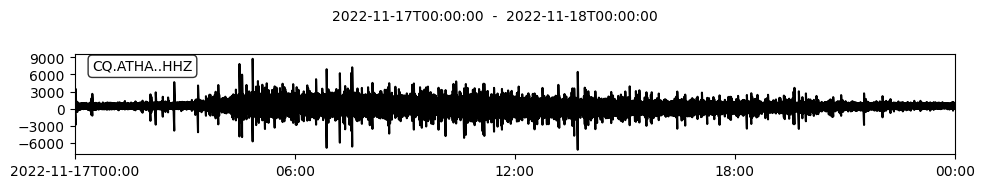

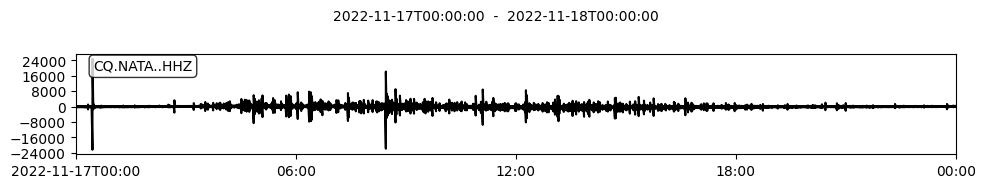

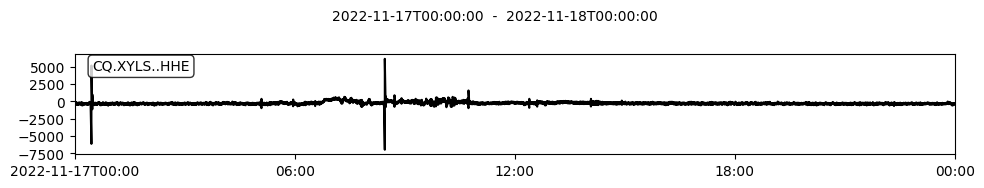

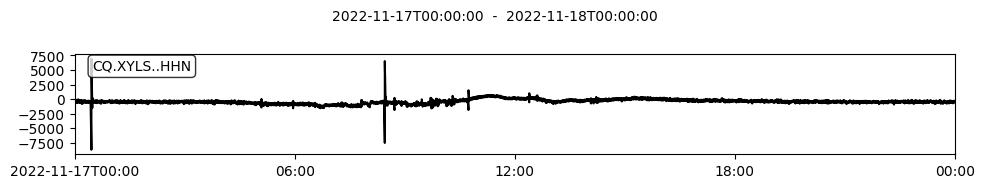

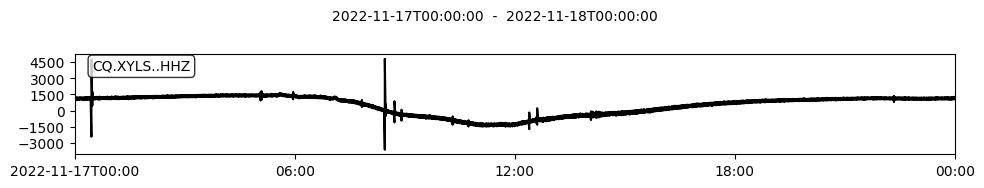

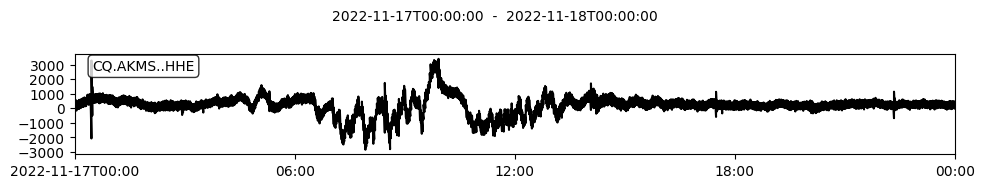

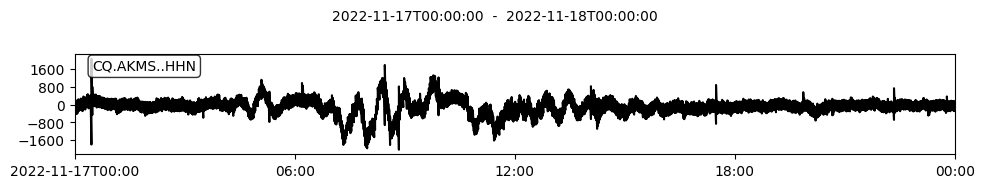

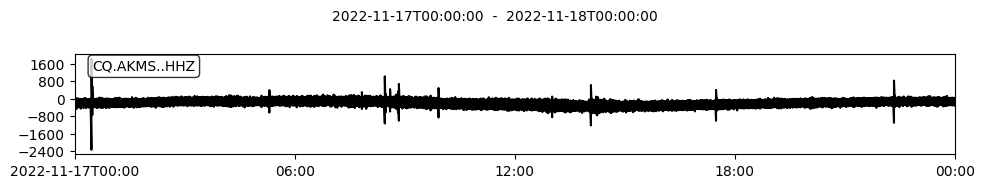

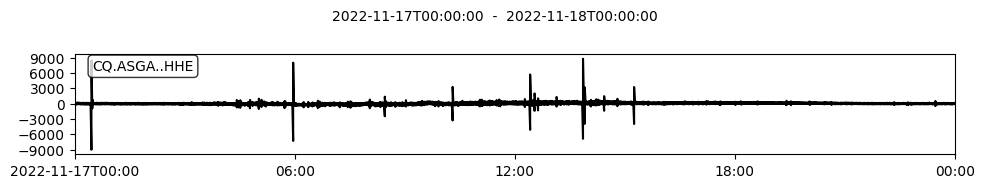

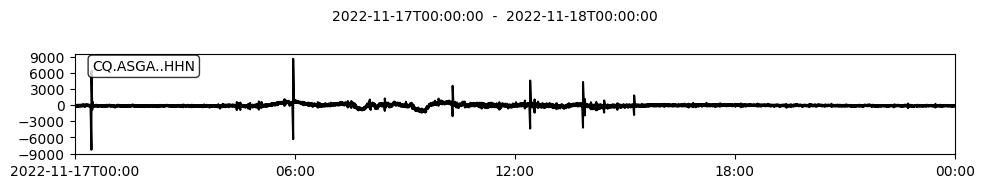

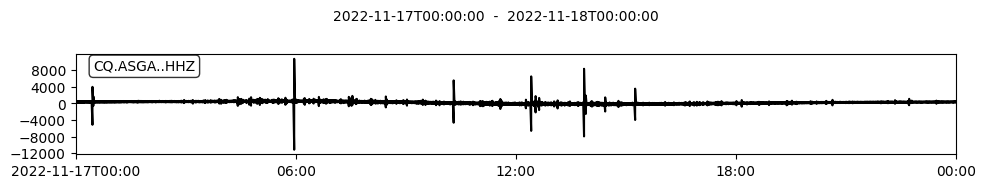

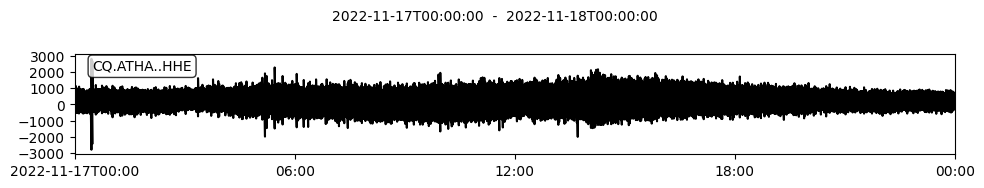

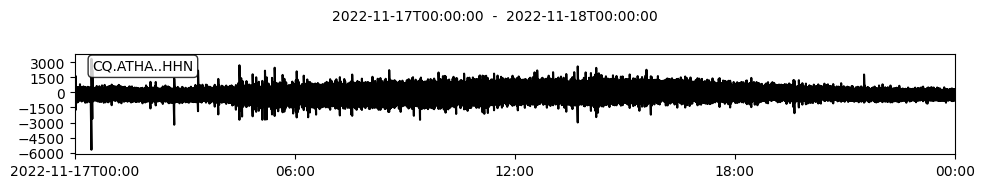

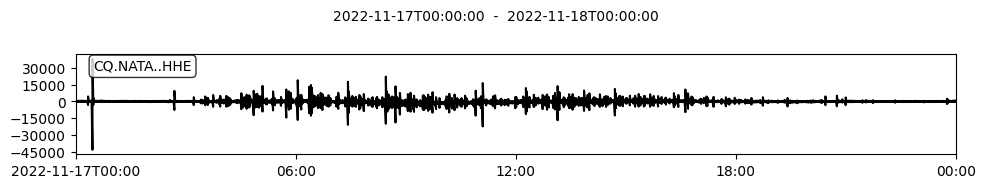

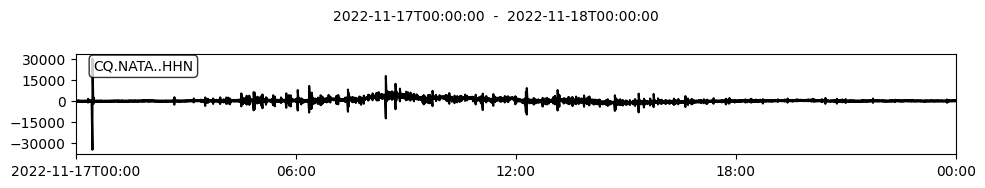

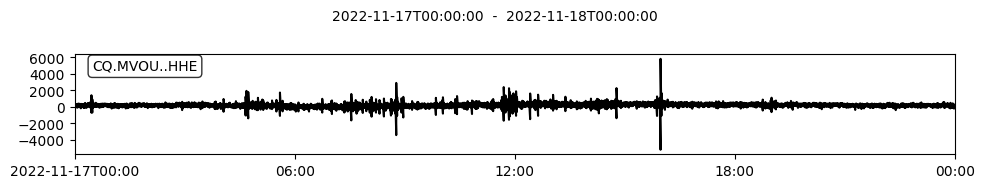

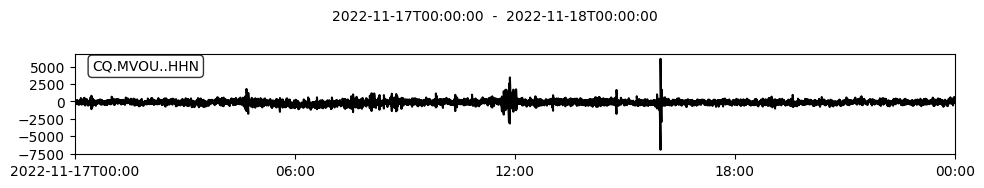

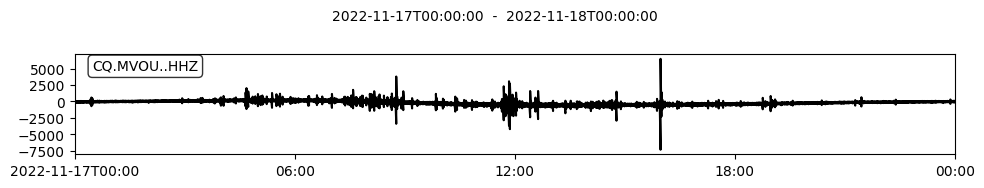

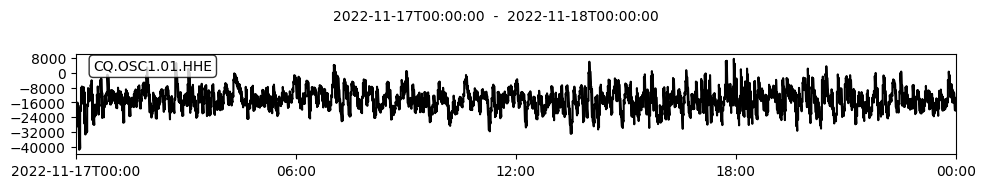

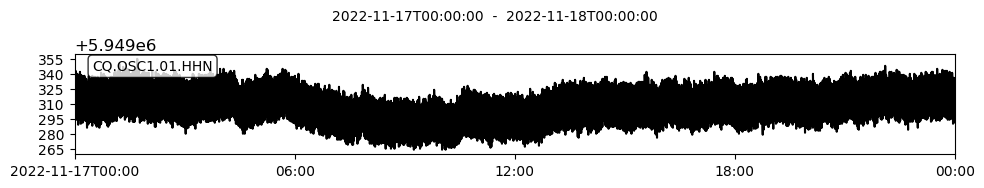

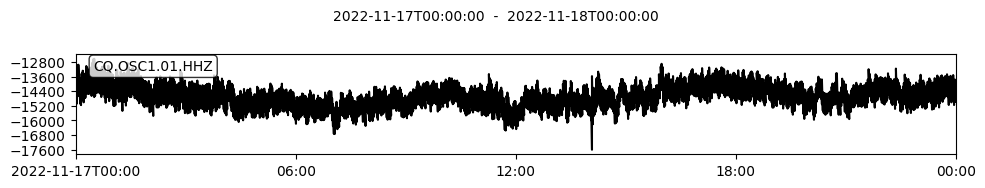

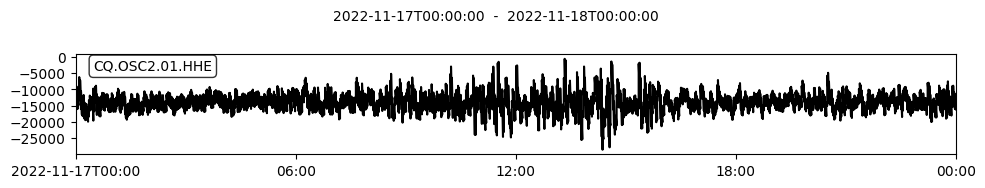

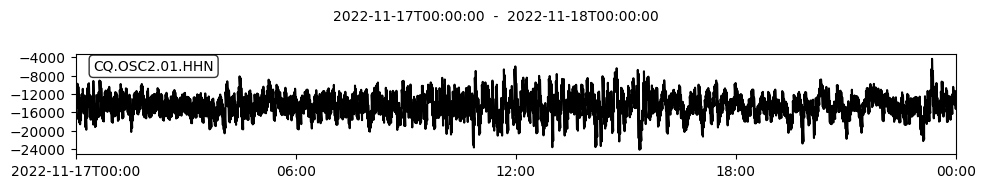

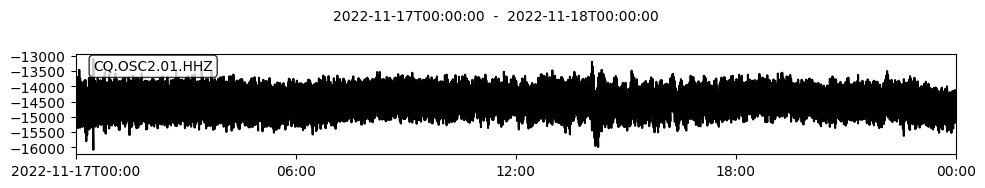

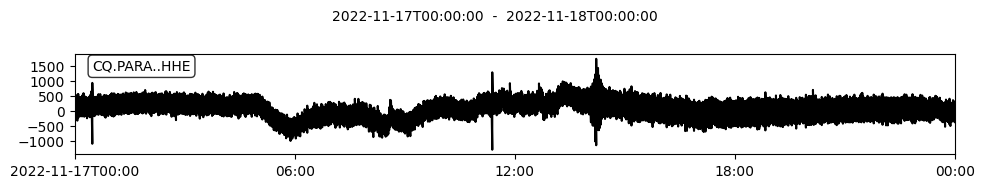

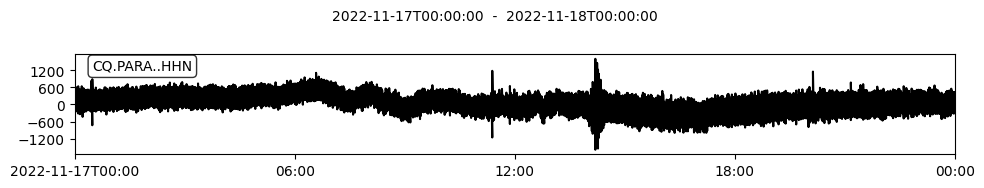

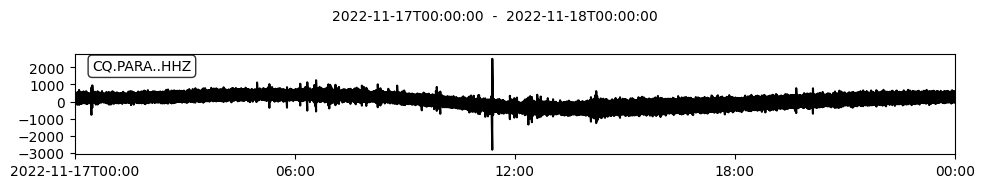

In [26]:
for tr in st:
    _plot = tr.plot(size=(1000,200))

In [ ]:
#st.detrend() # remove linear trend
#st.detrend("demean") # demean
#st.taper(0.05) # cosin taper

#st.filter("bandpass", freqmin = 1, freqmax = 5, corners=2, zerophase=True)

#_plot = st.plot(size=(1200,400))


In [ ]:
def get_seedid (tr):
    seedid=tr.stats.network+"."+tr.stats.station+"."+tr.stats.location+"."+tr.stats.channel
    return seedid

## PSD estimate
Use PPSD function from obsPy (tutorial [here](https://docs.obspy.org/tutorial/code_snippets/probabilistic_power_spectral_density.html)) - this follows the routine in [McNamara and Buland (2004)](https://doi.org/10.1785/012003001). From the abstract:

*Using this approach, power spectral density (PSD) is estimated at broadband seismic stations for frequencies ranging from ∼0.01 to 16 Hz. We selected a large number of 1-hr waveform segments during a 3-yr period, from 2001 to 2003, from continuous data collected by the U.S. National Seismograph Network and the Advanced National Seismic System (ANSS).*

*For each segment of continuous data, the PSD is estimated and smoothed in full-octave averages at 1/8 octave intervals. Powers for each 1/8 period interval were then accumulated in 1-dB power bins. A statistical analysis of power bins yields probability density functions (PDFs) as a function of noise power for each of the octave bands at each station and component. There is no need to account for earthquakes since they map into a background probability level. A comparison of day and night PDFs and an examination of artifacts related to station operation and episodic cultural noise allow us to estimate both the overall station quality and the level of earth noise at each site.*

In [27]:
st_merge = st.merge()
print(st_merge)

27 Trace(s) in Stream:

CQ.AKMS..HHE | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples
...
(25 other traces)
...
CQ.XYLS..HHZ | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples (masked)

[Use "print(Stream.__str__(extended=True))" to print all Traces]


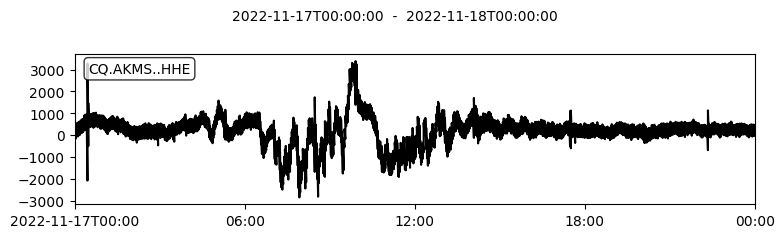

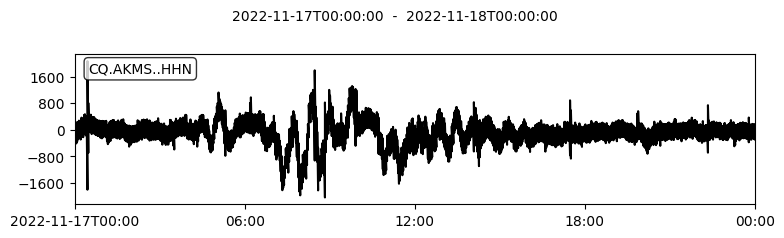

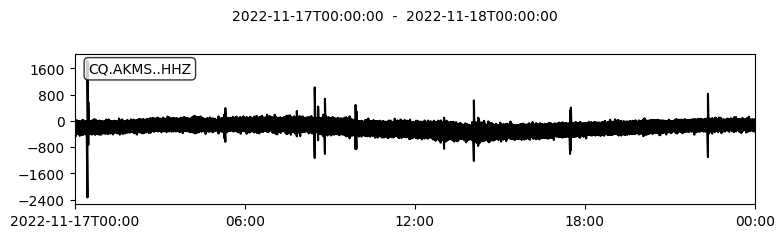

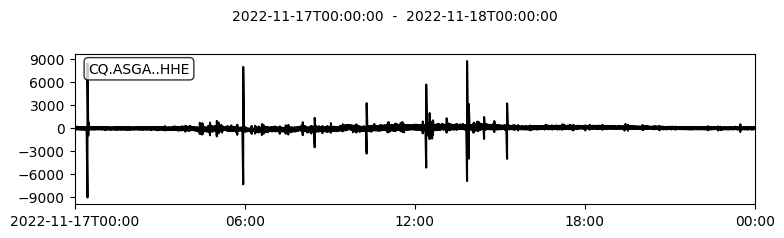

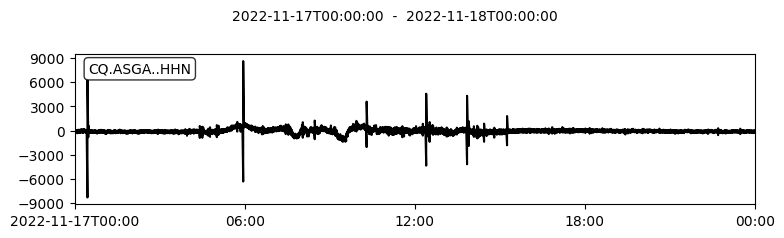

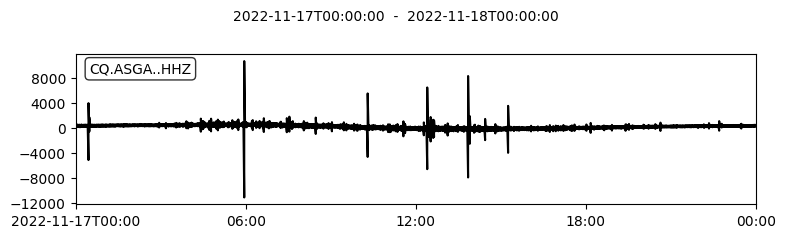

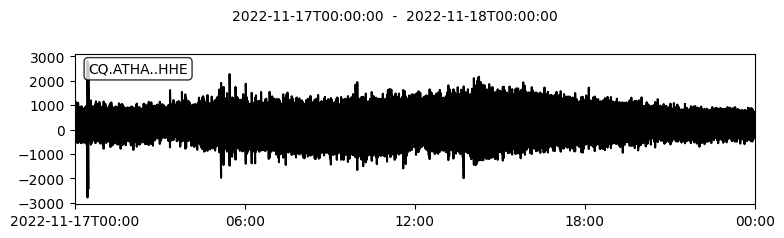

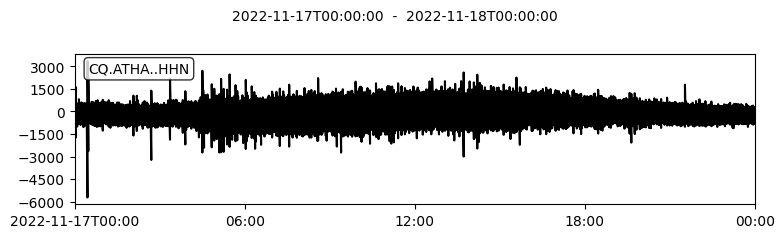

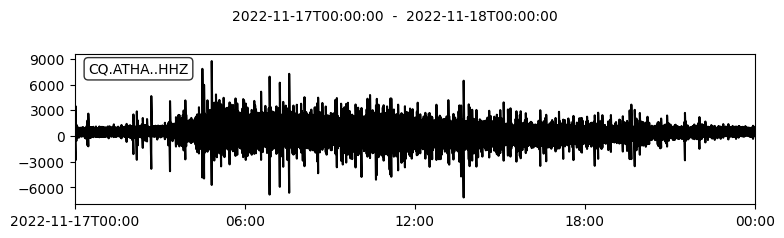

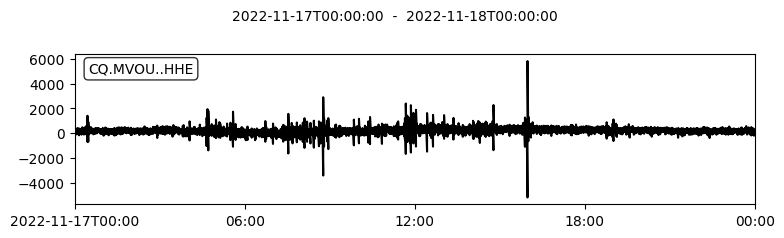

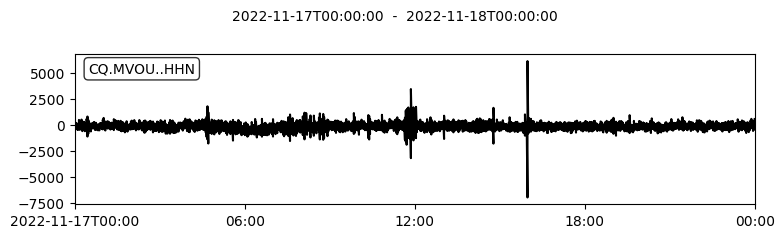

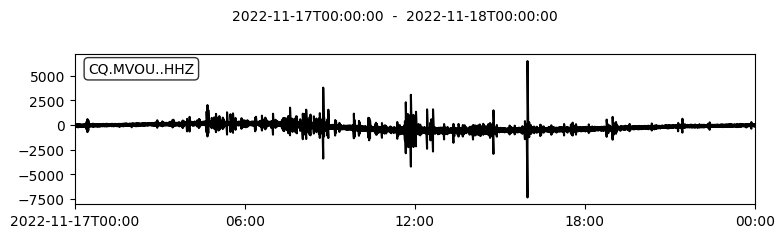

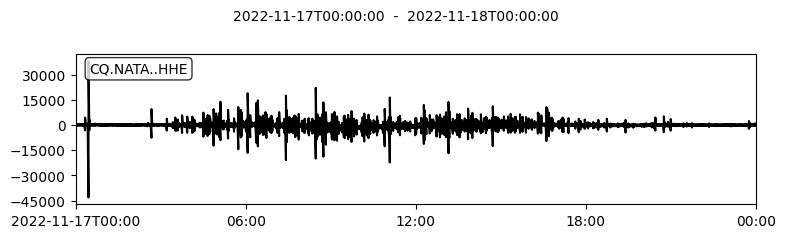

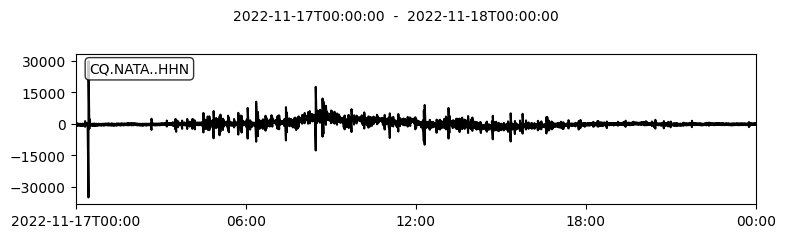

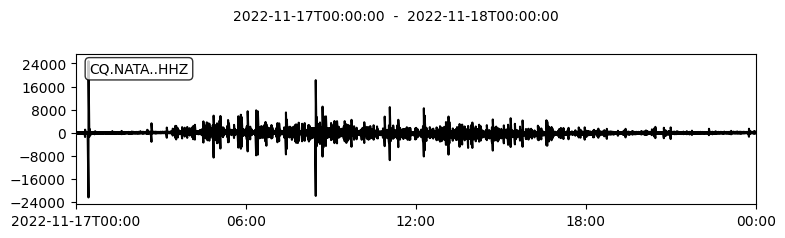

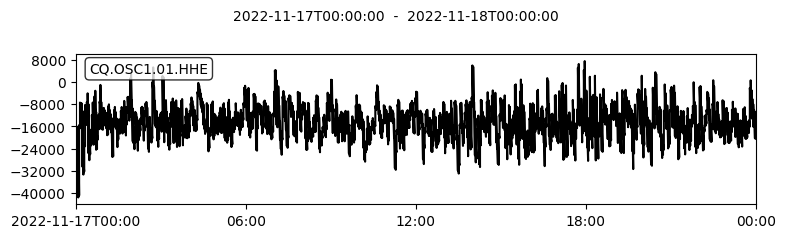

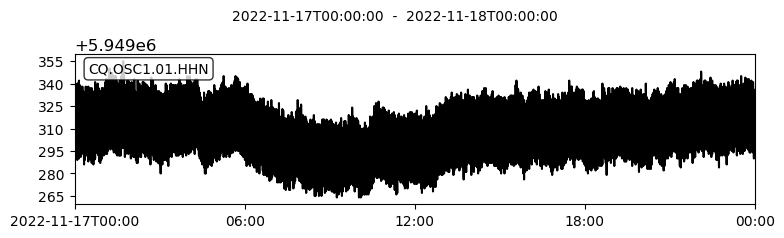

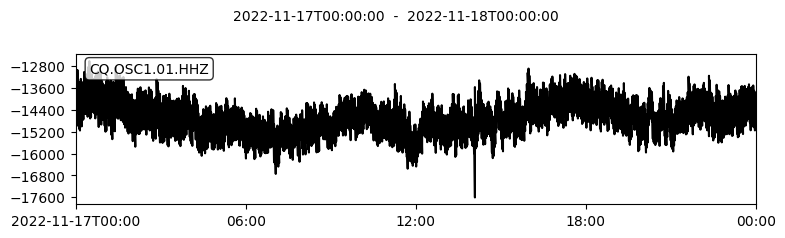

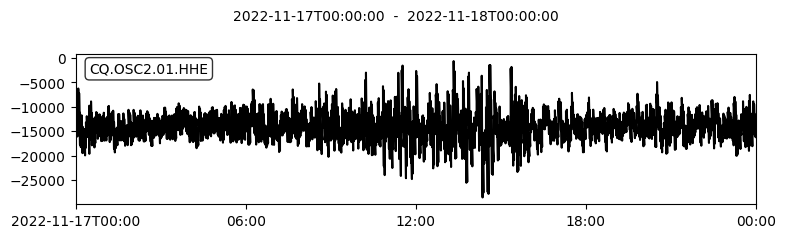

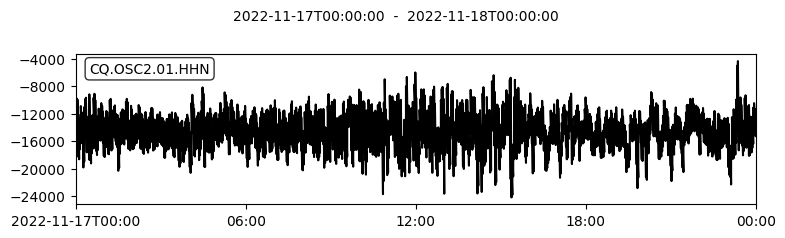

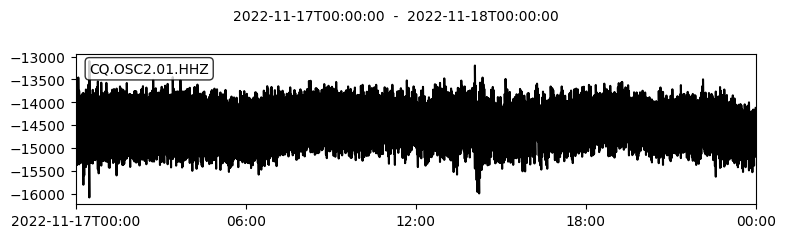

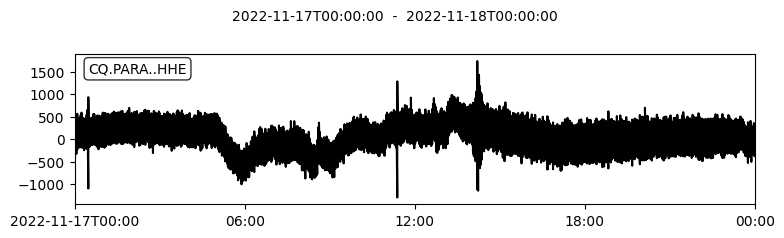

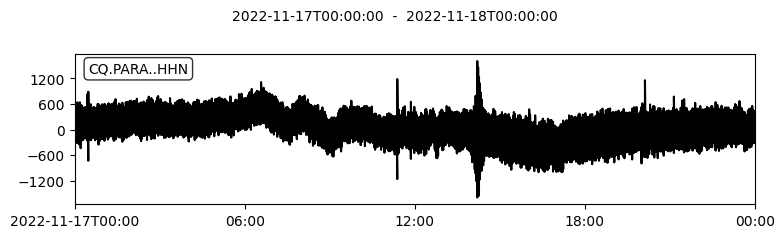

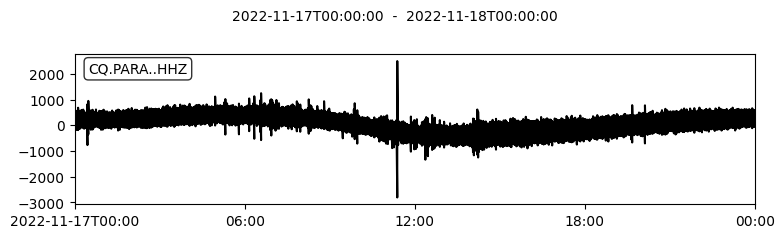

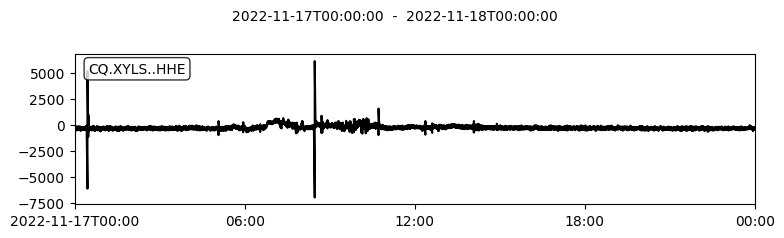

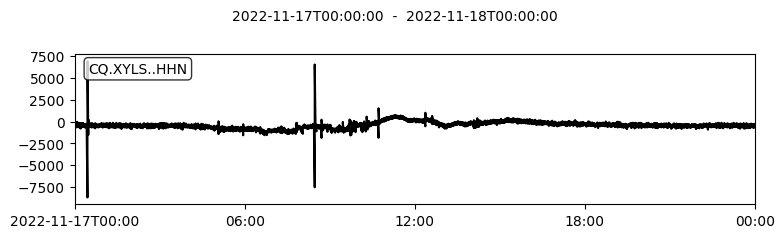

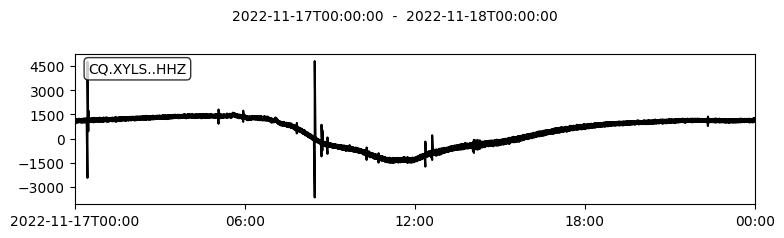

In [28]:
for tr in st:
    tr.plot()

In [29]:
# font size
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

#SMALL_SIZE = 32
#MEDIUM_SIZE = 32
#BIGGER_SIZE = 36

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
#tr = st[0] # first segment only. if data have gaps, only first segment is stored
#ppsd = PPSD(stats=tr.stats, metadata=inv, db_bins=(min_db, max_db, ddb), ppsd_length=ppsd_length)



In [30]:
st_merge[0].stats

               network: CQ
               station: AKMS
              location: 
               channel: HHE
             starttime: 2022-11-17T00:00:00.000000Z
               endtime: 2022-11-18T00:00:00.000000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 8640001
                 calib: 1.0
_fdsnws_dataselect_url: http://eida.gein.noa.gr/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 21079, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 319054336})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2022, 11, 18, 0, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2022, 11, 17, 0, 0))']

In [31]:
print(st_merge)

27 Trace(s) in Stream:

CQ.AKMS..HHE | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples
...
(25 other traces)
...
CQ.XYLS..HHZ | 2022-11-17T00:00:00.000000Z - 2022-11-18T00:00:00.000000Z | 100.0 Hz, 8640001 samples (masked)

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [32]:
st_merge[0].stats

               network: CQ
               station: AKMS
              location: 
               channel: HHE
             starttime: 2022-11-17T00:00:00.000000Z
               endtime: 2022-11-18T00:00:00.000000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 8640001
                 calib: 1.0
_fdsnws_dataselect_url: http://eida.gein.noa.gr/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 21079, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 319054336})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2022, 11, 18, 0, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2022, 11, 17, 0, 0))']

## Inventory

In [ ]:
vars(inv[0][0][0])


In [ ]:
inv[0][0][0].latitude

In [ ]:


st_lat = inv[0][0][0].latitude
st_lon = inv[0][0][0].longitude
st_ele = inv[0][0][0].elevation
st_dep = inv[0][0][0].depth
print("# st_lat = ", st_lat, " st_lon = ", st_lon)

In [ ]:
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.nrl import NRL

In [ ]:
# We'll first create all the various objects. These strongly follow the
# hierarchy of StationXML files.
inv_tmp = Inventory(
    # We'll add networks later.
    networks=[],
    # The source should be the id whoever create the file.
    source="ObsPy-Tutorial")

net_tmp = Network(
    # This is the network code according to the SEED standard.
    #code="AA",
    code=net,
    # A list of stations. We'll add one later.
    stations=[],
    description="SmartSolo test",
    # Start-and end dates are optional.
    start_date=UTCDateTime(2010, 1, 1))

sta_tmp = Station(
    # This is the station code according to the SEED standard.
    #code="9001",
    code=sta,
    latitude=st_lat,
    longitude=st_lon,
    elevation=st_ele,
    creation_date=UTCDateTime(2019, 1, 1),
    site=Site(name="Inside the Byerly Vault "))


cha_tmp = Channel(
    # This is the channel code according to the SEED standard.
    #code="DPZ",
    code=com,
    # This is the location code according to the SEED standard.
    #location_code=loc,
    location_code="",
    # Note that these coordinates can differ from the station coordinates.
    latitude=st_lat,
    longitude=st_lon,
    elevation=st_ele,
    depth=st_dep,
    azimuth=0.0,
    dip=-90.0,
    sample_rate=250)

    
# By default this accesses the NRL online. Offline copies of the NRL can
# also be used instead
nrl = NRL()
# The contents of the NRL can be explored interactively in a Python prompt,
# see API documentation of NRL submodule:
# http://docs.obspy.org/packages/obspy.clients.nrl.html
# Here we assume that the end point of data logger and sensor are already
# known:

#print(nrl.sensors['DTCC (manuafacturers of SmartSolo)']['5 Hz']['Rc=1850, Rs=430000'])
#print(nrl.dataloggers['DTCC (manufacturers of SmartSolo']['SmartSolo IGU-16']['0 dB (1)']['500']['Minimum Phase']['Off'])
response = nrl.get_response( # doctest: +SKIP
    #sensor_keys=['DTCC (manuafacturers of SmartSolo)', '5 Hz', 'Rc=1850, Rs=430000'],
    #sensor_keys=['DTCC (manuafacturers of SmartSolo)', '5 Hz', 'Rc=1850, Rs=430000'],
    # 9K
    #print(nrl.sensors['Magseis Fairfield']['Generation 2']['5 Hz']) 
    #sensor_keys=['Magseis Fairfield', 'Generation 2', '5 Hz'],
    #Geospace	GS-30CT	10 Hz / 0.1 s	395 Ohms	1000 Ohms	19.7 V/m/s	RESP.XX.NS610..SHZ.GS30CT.10.395.1000.19_7	Geospace	Gen. 1 ZLand Node sensor
    #print(nrl.sensors['Geo Space/OYO']['GS-30CT']['395 Ohms']['1000 Ohms']) 
    sensor_keys=['Geo Space/OYO','GS-30CT','395 Ohms','1000 Ohms'],


    
    #datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '0 dB (1)', '500', 'Minimum Phase', 'Off'])
    #datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '0 dB (1)', '500', 'Linear Phase', 'Off'])

    #print(nrl.dataloggers['Nanometrics']['Taurus']['16 Vpp (1)']['Low (default)']['Off']['100'])
    #datalogger_keys=['Nanometrics','Taurus','16 Vpp (1)','Low (default)','Off','100'])
    #datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '36 dB (64)', '4000', 'Minimum Phase', 'Off'])
    # 9K node
    #print(nrl.dataloggers['Magseis Fairfield']['Zland 1C or 3C']['0 dB (1)']['500']['Linear Phase']['Off'])
    #datalogger_keys=['Magseis Fairfield', 'Zland 1C or 3C', '36 dB (64)', '250', 'Linear Phase', 'Off'])
    datalogger_keys=['Magseis Fairfield', 'Zland 1C or 3C', '0 dB (1)', '250', 'Linear Phase', 'Off'])

response_deci = nrl.get_response( # doctest: +SKIP
    sensor_keys=['DTCC (manuafacturers of SmartSolo)', '5 Hz', 'Rc=1850, Rs=430000'],

    #datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '0 dB (1)', '500', 'Minimum Phase', 'Off'])
    #datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '0 dB (1)', '500', 'Linear Phase', 'Off'])


    #print(nrl.dataloggers['DTCC (manufacturers of SmartSolo']['SmartSolo IGU-16']['36 dB (64)']['4000']['Minimum Phase']['Off'])
    datalogger_keys=['DTCC (manufacturers of SmartSolo', 'SmartSolo IGU-16', '36 dB (64)', '250', 'Minimum Phase', 'Off'])

    #datalogger_
# Now tie it all together.
cha_tmp.response = response
#cha_tmp_deci.response = response_deci

sta_tmp.channels.append(cha_tmp)

#sta_tmp.channels.append(cha_tmp_deci)

net_tmp.stations.append(sta_tmp)

inv_tmp.networks.append(net_tmp)

# And finally write it to a StationXML file. We also force a validation against
# the StationXML schema to ensure it produces a valid StationXML file.
#
# Note that it is also possible to serialize to any of the other inventory
# output formats ObsPy supports.
inv_tmp.write("station_9KNodal_36dB_tmp.xml", format="stationxml", validate=True)
#inv.write("station_HFNodal_36dB_tmp.sacpz", format="SACPZ")

#inv.write("station_HFNodal_36dB_tmp.resp", format="RESP", validate=True)

# In[35]:


inv_36dB_9K =read_inventory("station_9KNodal_36dB_tmp.xml")
print(inv_36dB_9K)




In [ ]:
print(inv)

In [ ]:
#print(inv1)

## PSD plot

In [33]:
period_low = 0.05 # 0.05 sec
period_low = 0.01 # 0.05 sec
# def
period_low = 0.005 # 0.05 sec
period_max = 1000 # 1000 sec 

# def
period_low = 0.01 # 0.05 sec
period_max = 2000 # 1000 sec 
#period_low = 2 # 0.05 sec
#period_max = 10000 # 1000 sec 

#period_low = 2 # 0.05 sec
#period_max = 1000 # 1000 sec 

freq_min = 0.01
freq_max = 40



In [34]:
# psd estimate
min_db = -200 # min. db 
max_db = 0 # max db
ddb = 1 # 1 db increment

In [37]:
ppsd_length = 7200 #  unit is seconds

#ppsd_length = 60 #  unit is seconds
ppsd_length = 60*5 #  unit is seconds
ppsd_length = 60*20 #  unit is seconds
ppsd_length = 60*60 #  unit is seconds

# 2 hours # def
# ppsd_length = 60*60*2 #  unit is seconds

#ppsd_length = 60*60*1 #  unit is seconds
#ppsd_length = 60*60*0.5 #  unit is seconds

#ppsd_length = 60*60*24 #  unit is seconds # 24 hours


#ppsd_length = 7200 #  unit is seconds


In [38]:
from obspy.imaging.cm import pqlx
from obspy.imaging.cm import viridis_white_r

cmap = viridis_white_r


In [39]:
# plot 
# PFO layout
plt.rcParams['figure.figsize'] = 12,10
plt.rcParams['figure.figsize'] = 10,10

#period_low = 0.05 # 0.05 sec
#period_low = 0.01 # 0.05 sec

#period_low = 1/1000 # 0.05 sec

#period_low = 1/2000 # 0.05 sec
#period_low = 1/4000 # 0.05 sec
#period_max = 1000 # 1000 sec 
#period_max = 2000 # 1000 sec 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [40]:
# def
period_smoothing_width_octaves=1.0
period_step_octaves=0.125

#period_smoothing_width_octaves=1.0/2
#period_smoothing_width_octaves=0.8
#period_step_octaves=0.125/10

/Users/savvasmarcou/opt/anaconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/spectral_estimation.py:1895: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


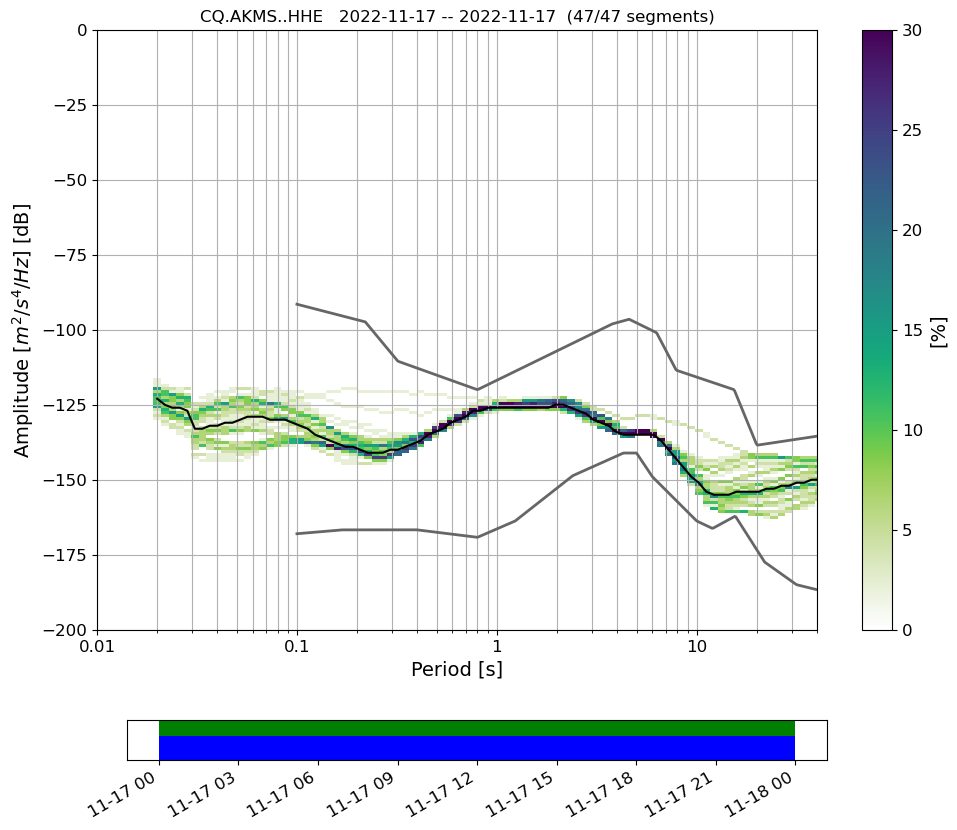

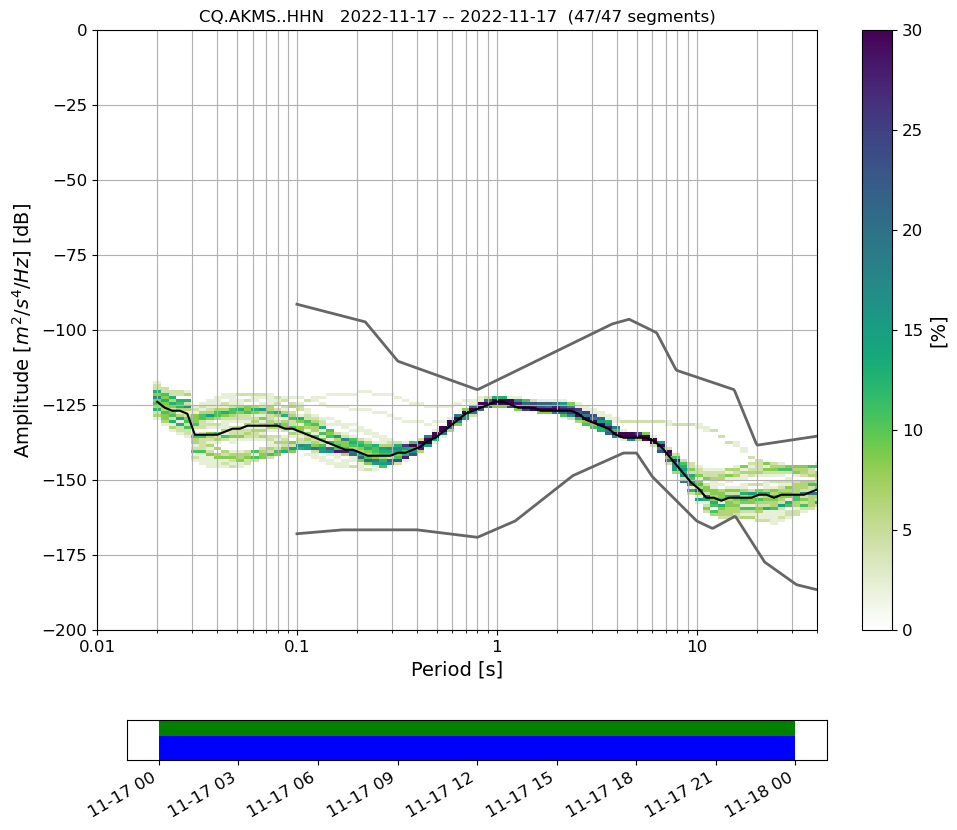

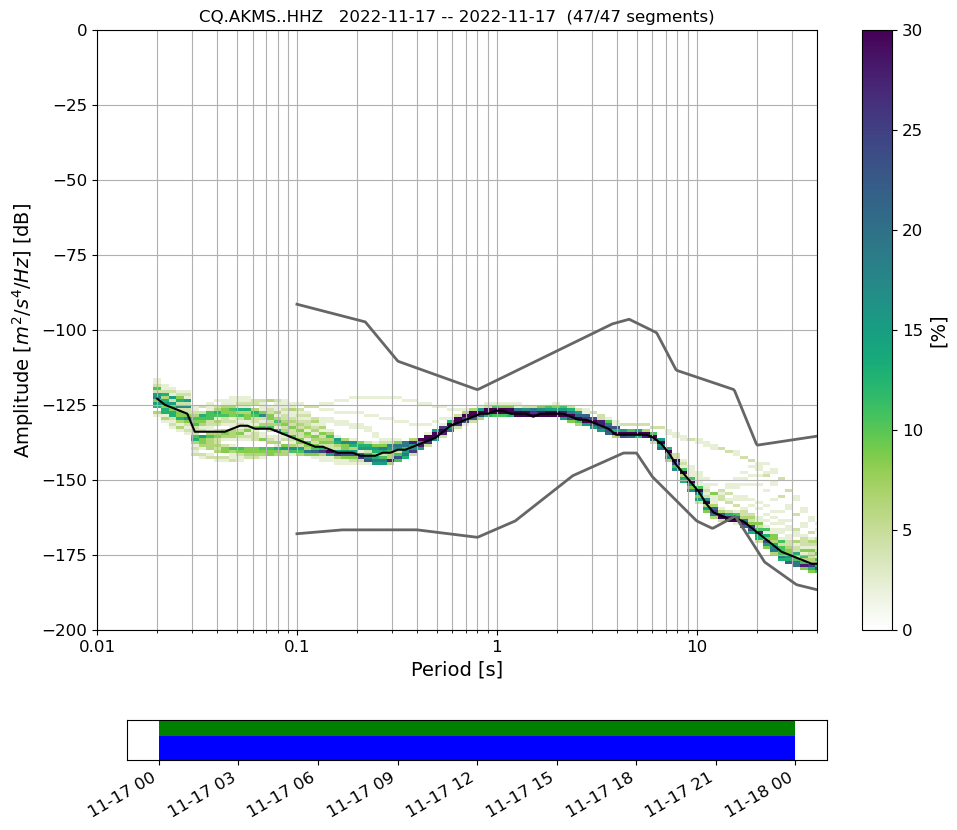

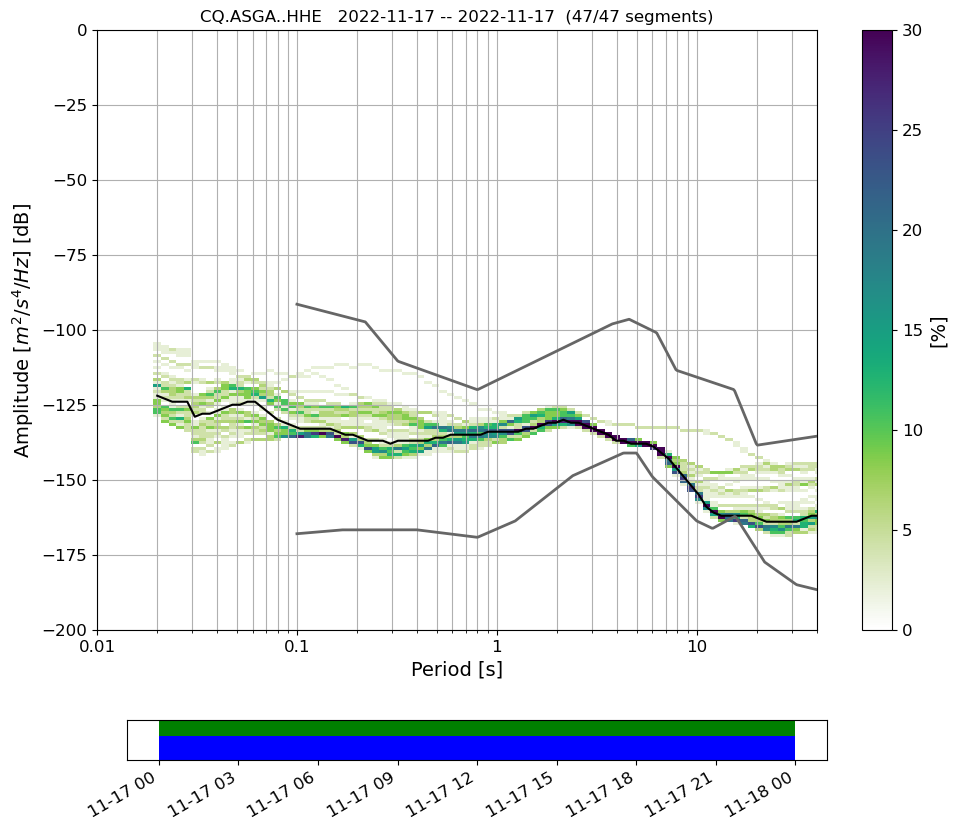

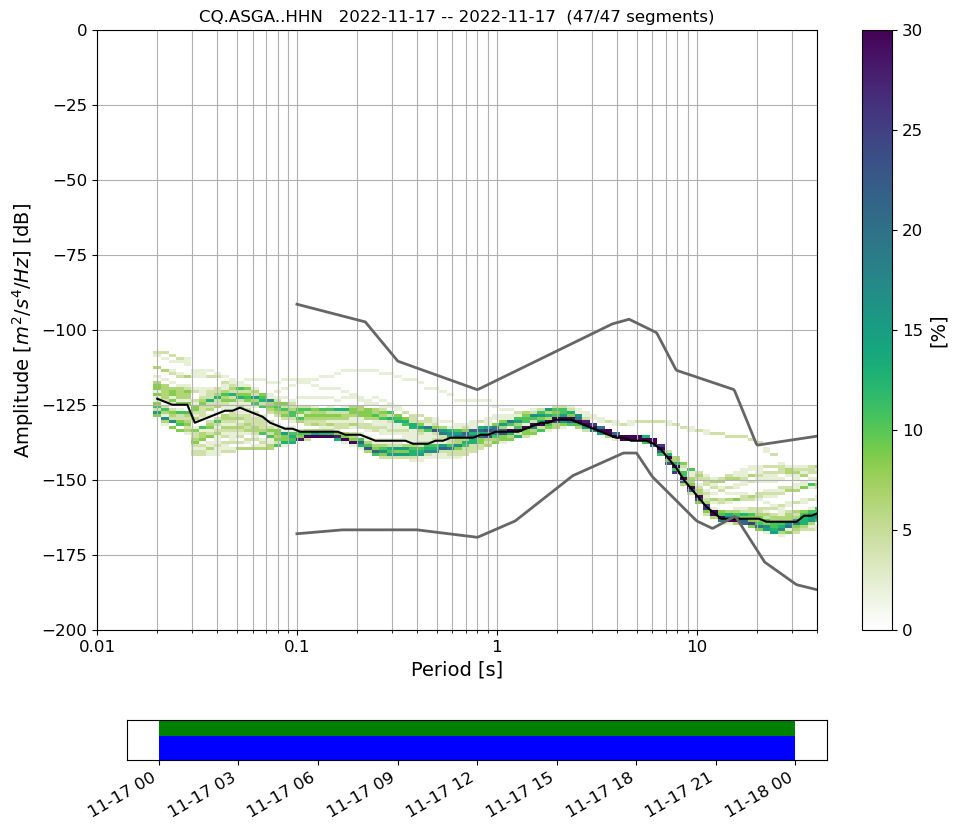

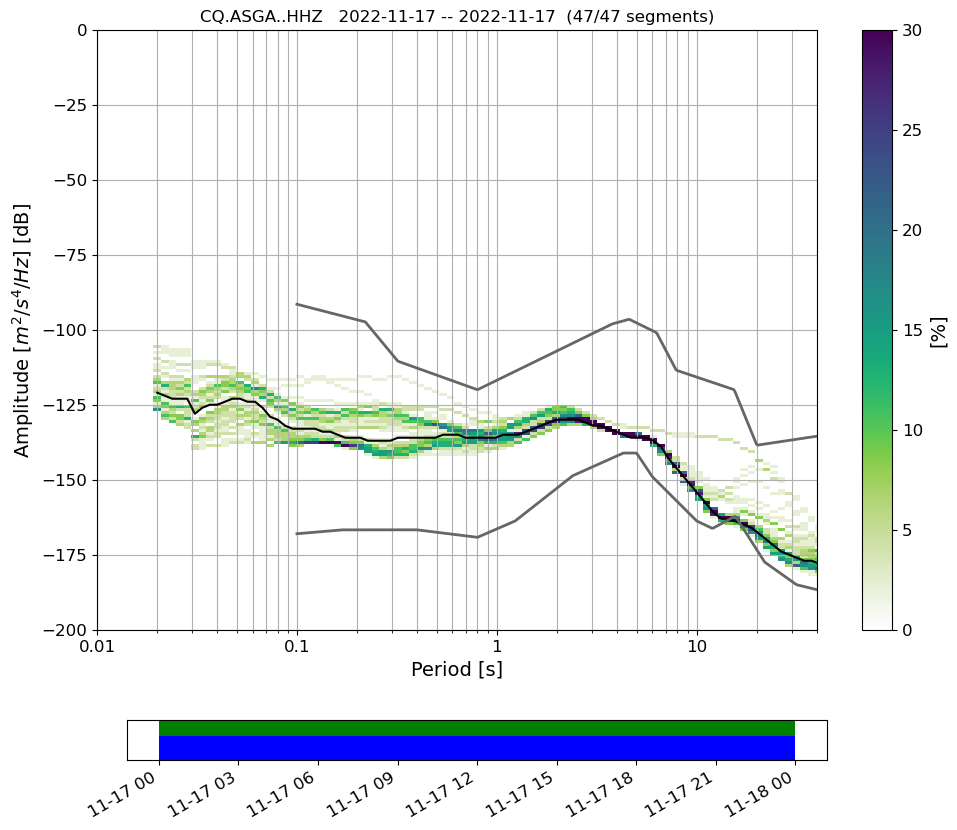

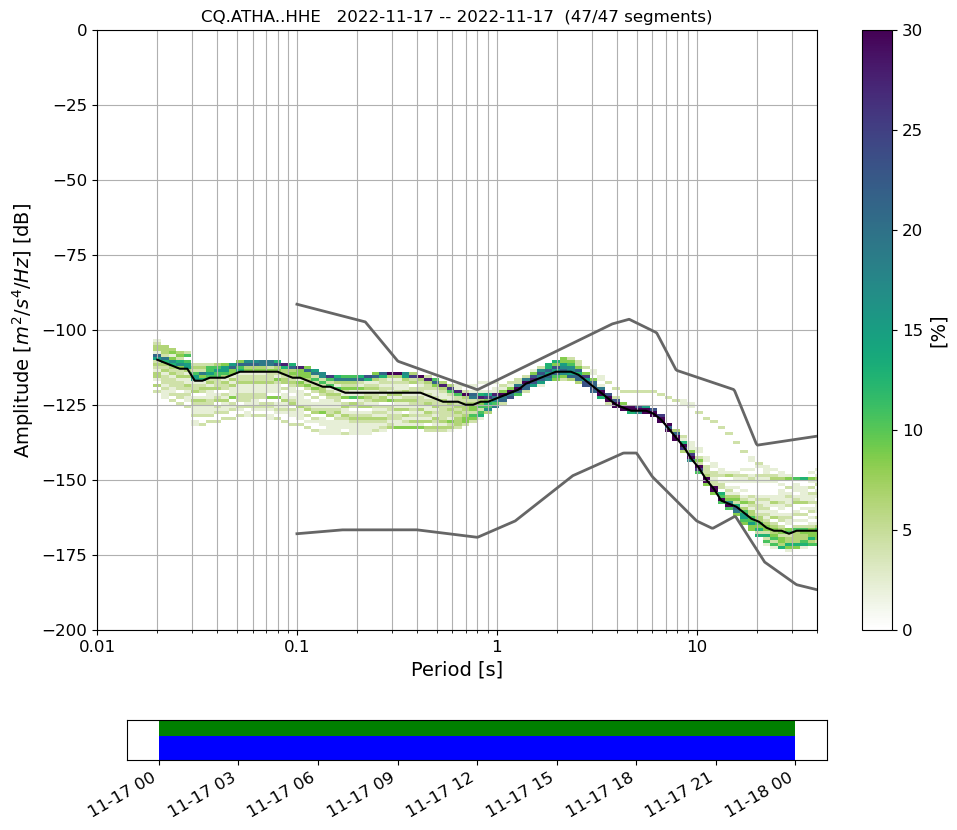

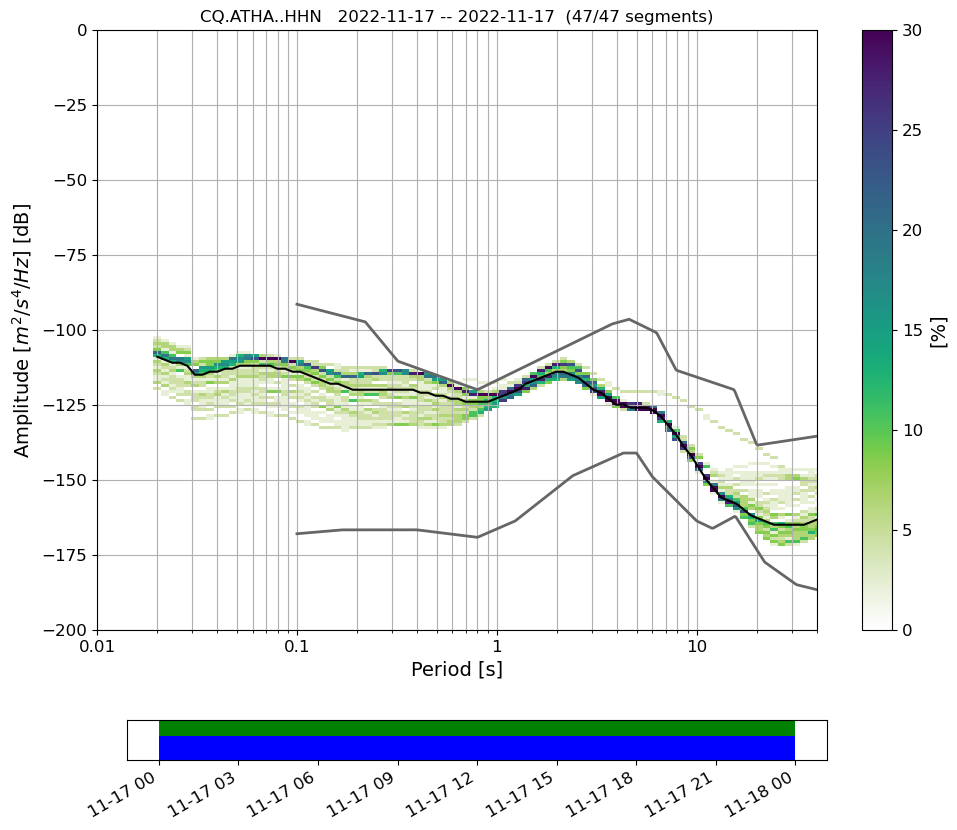

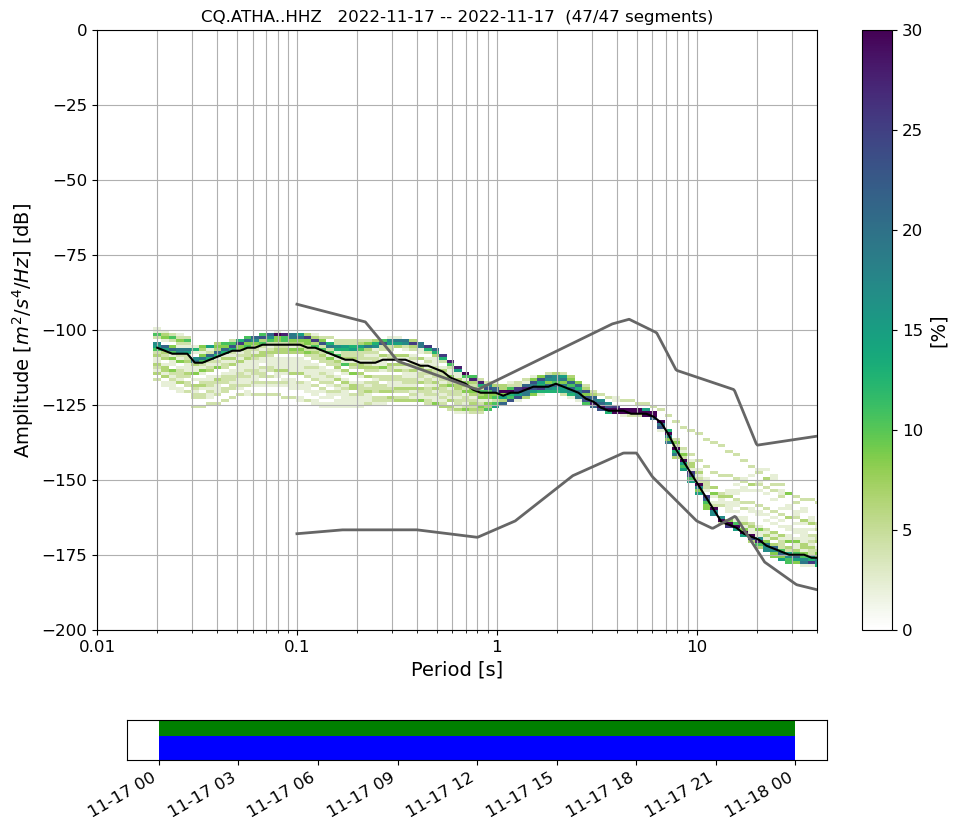

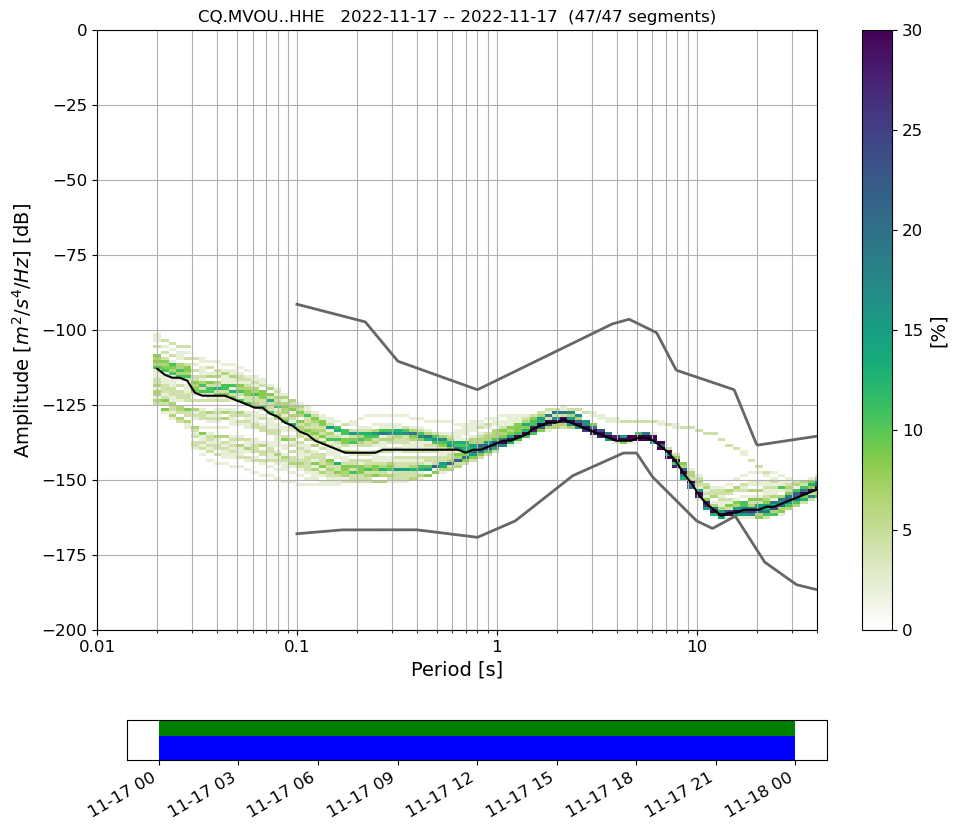

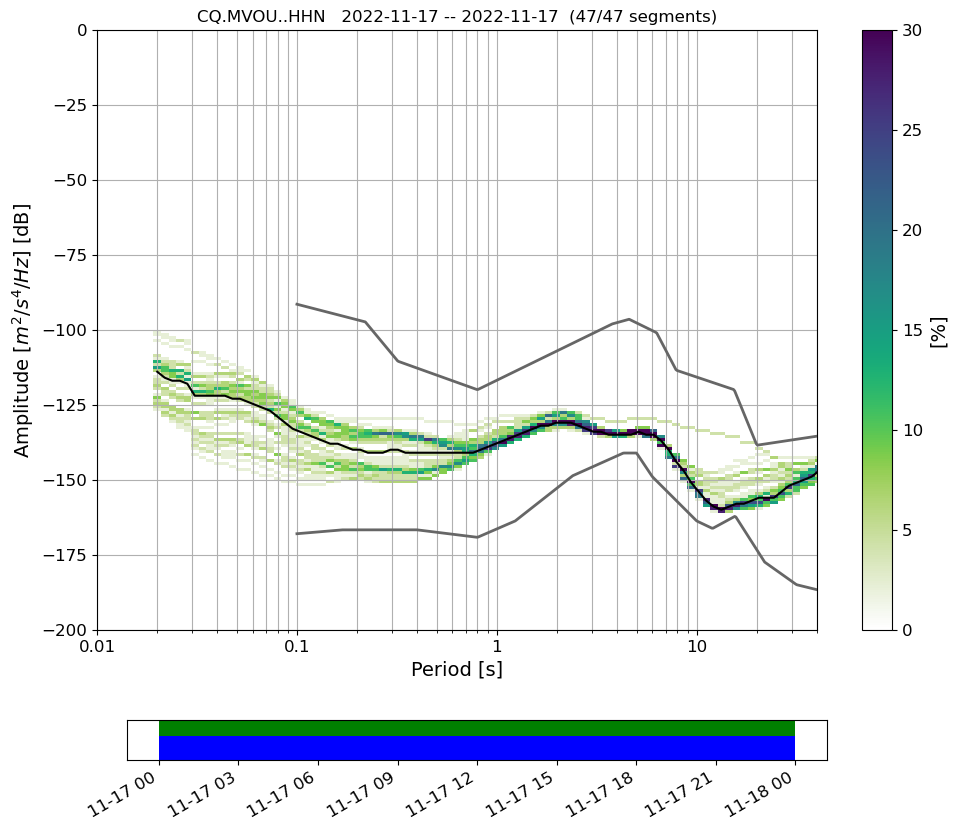

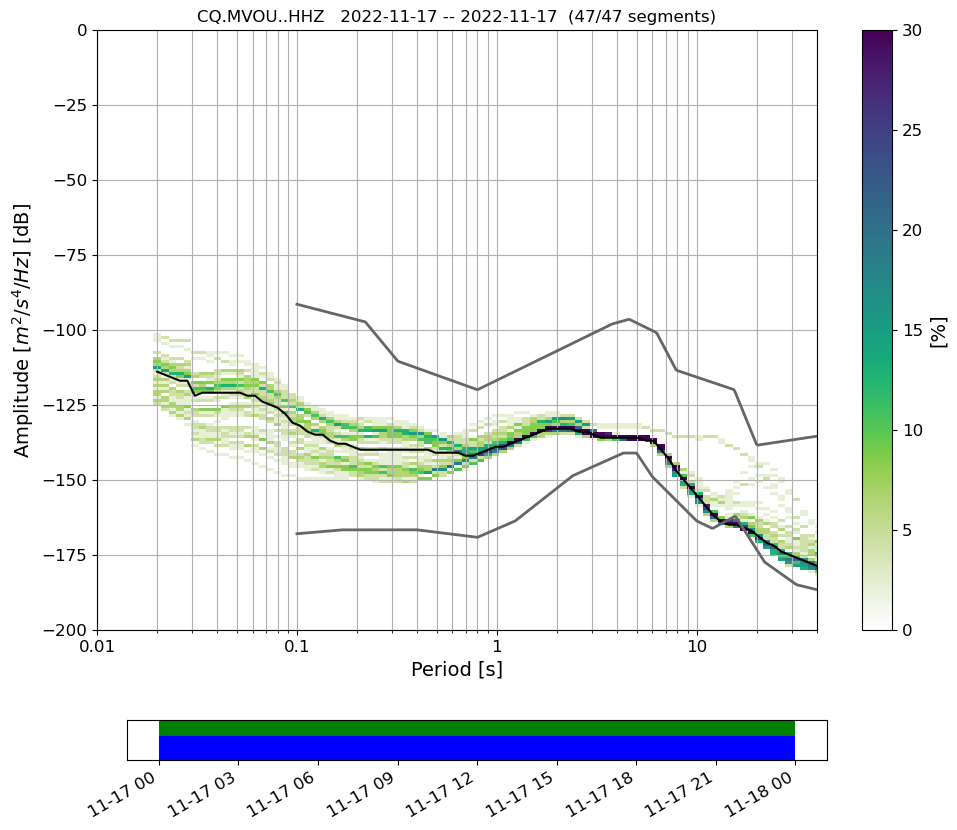

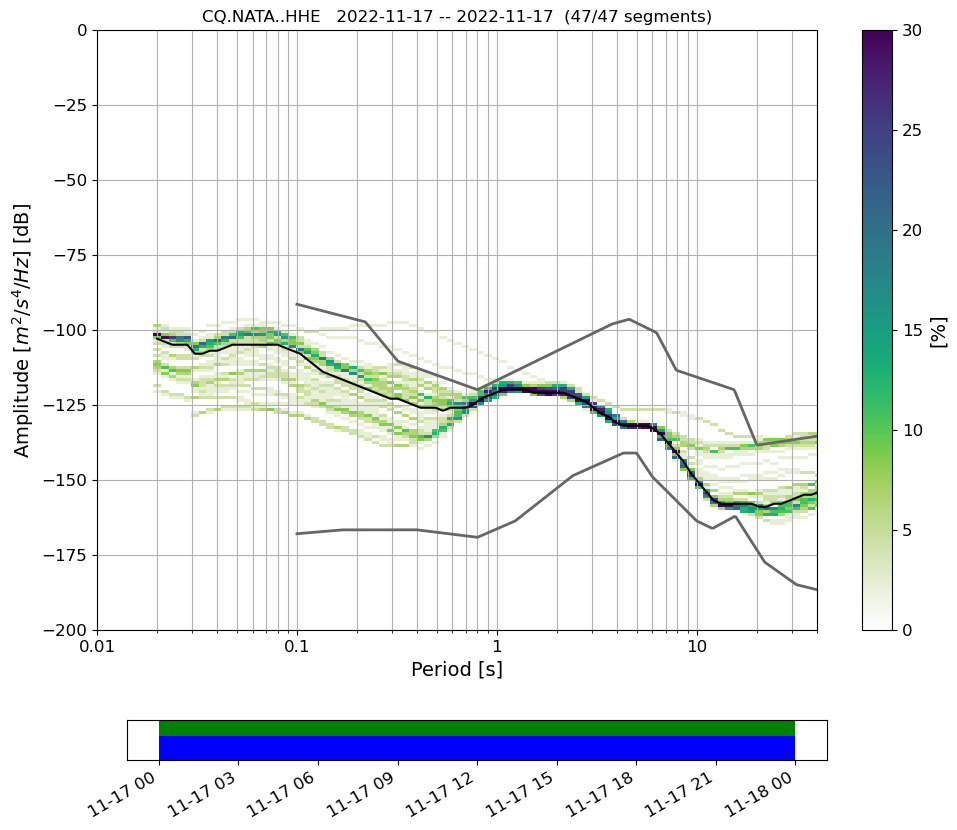

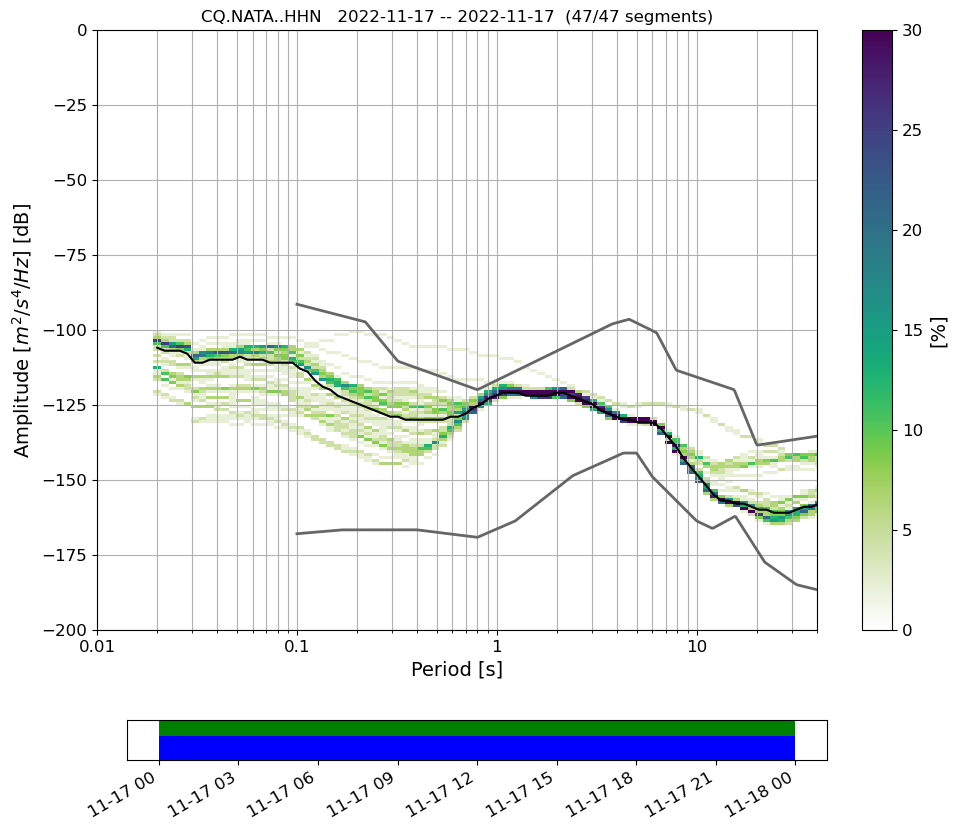

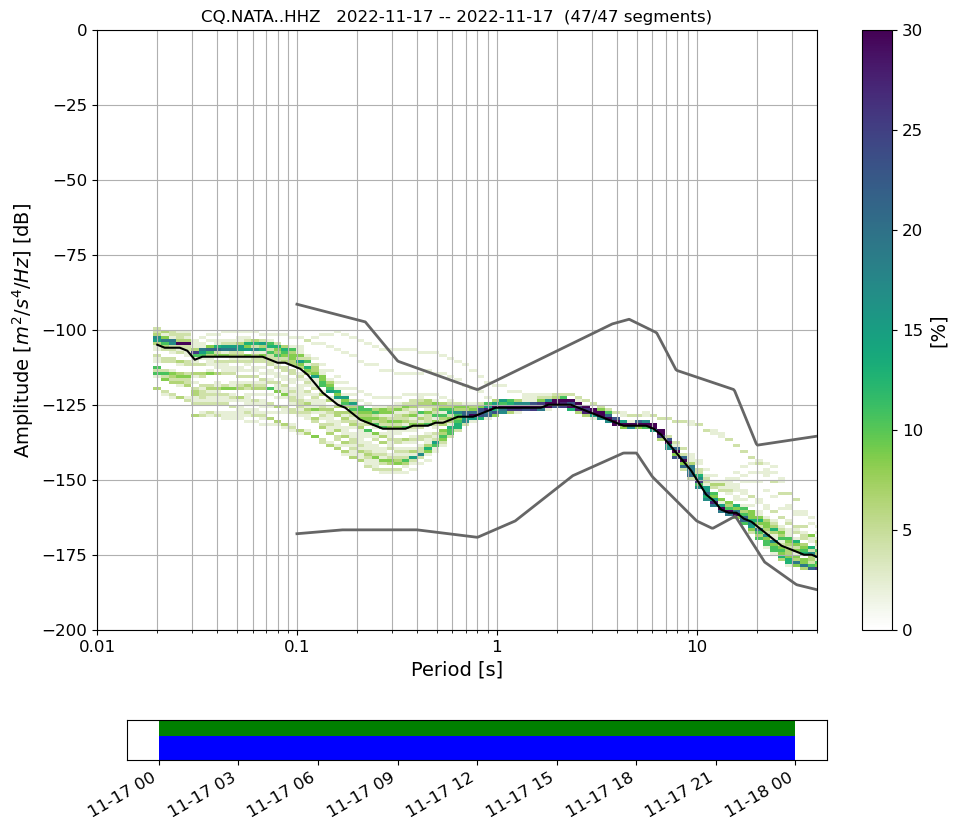

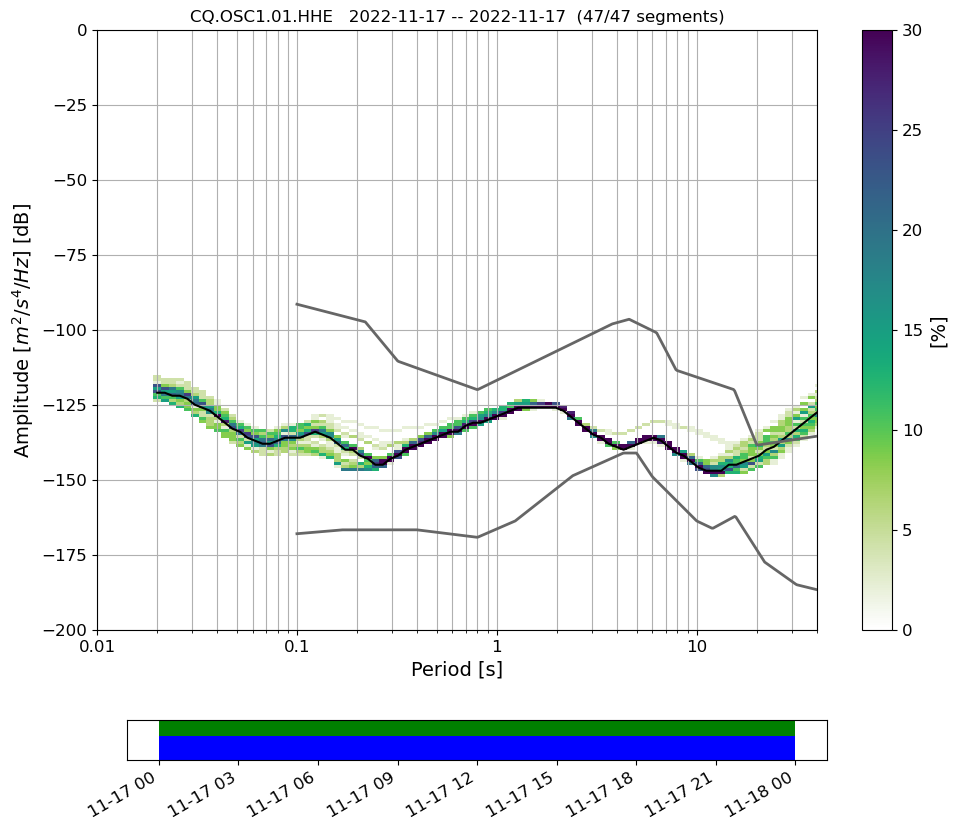

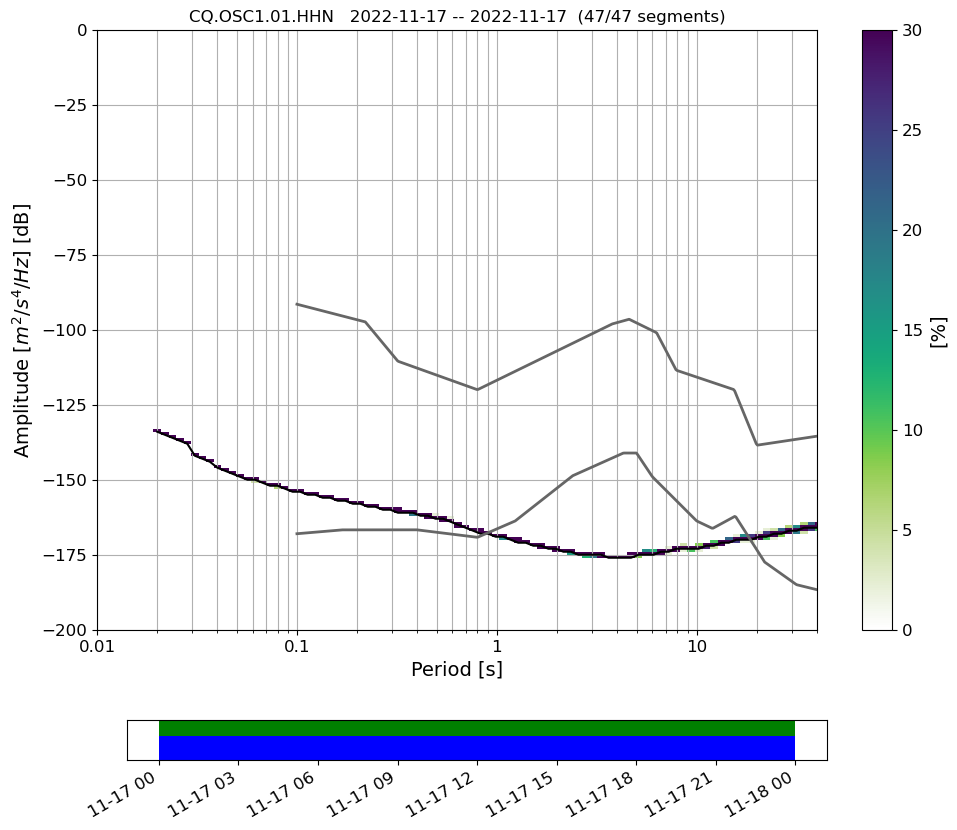

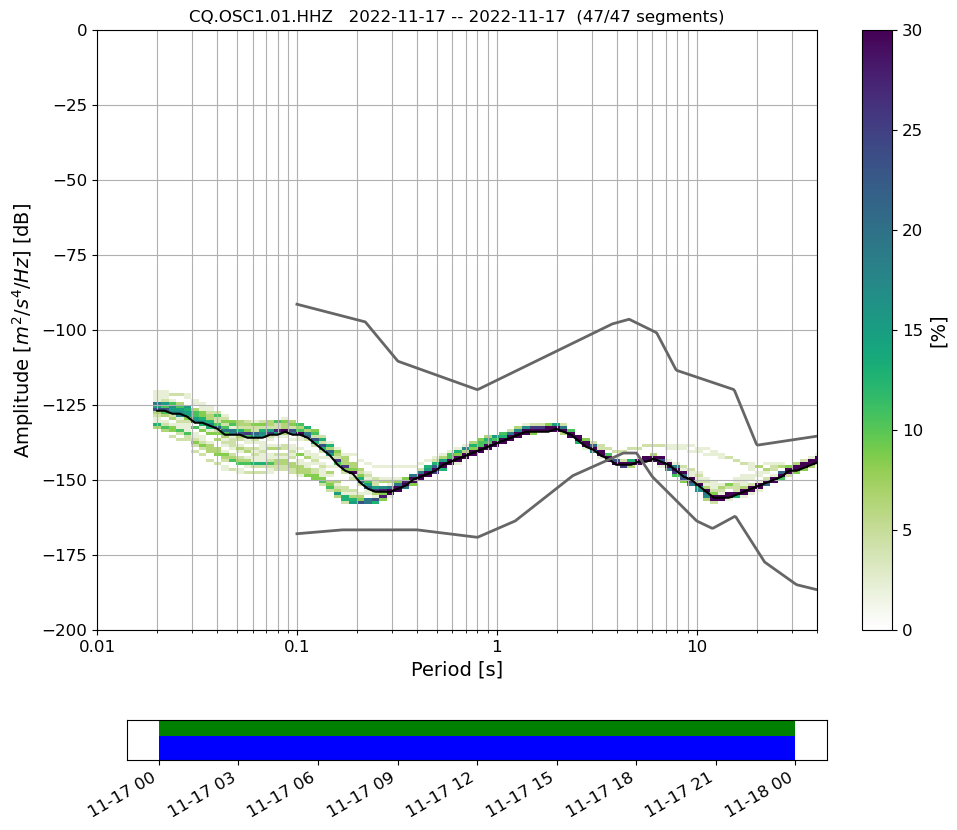

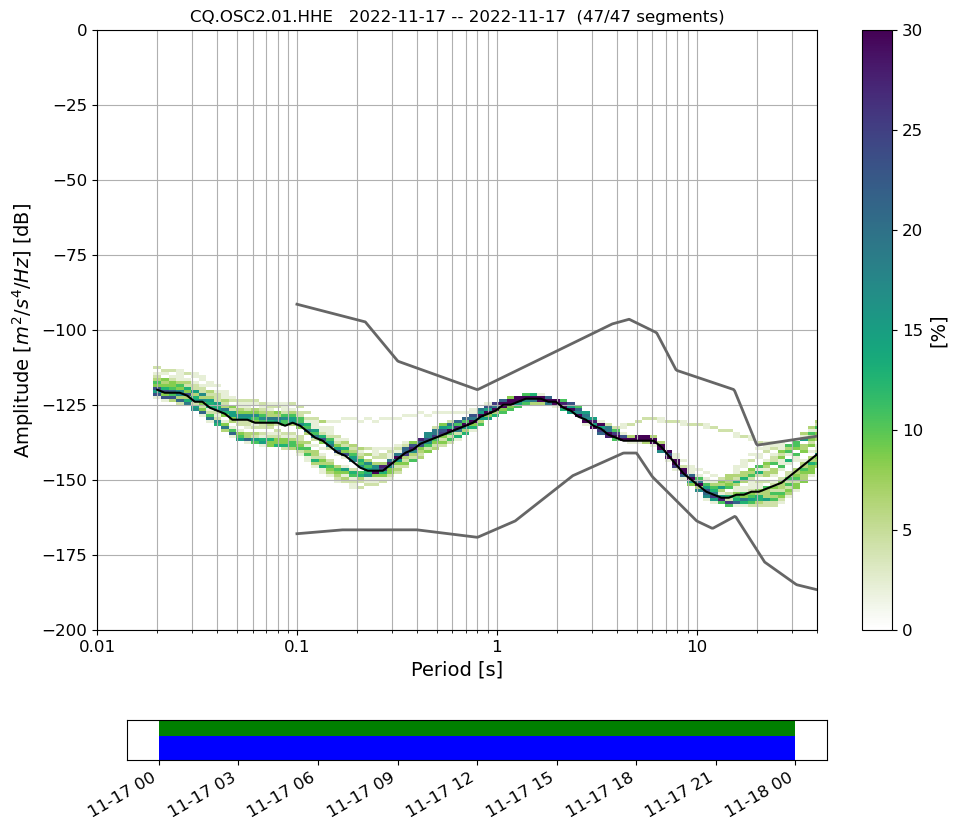

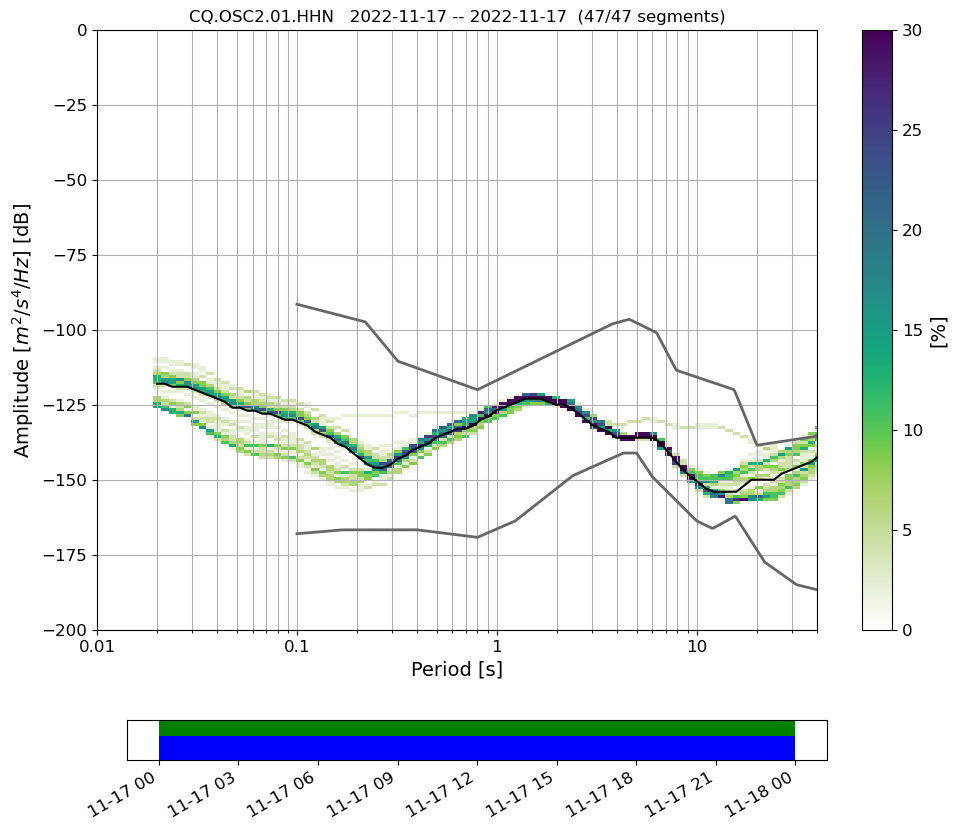

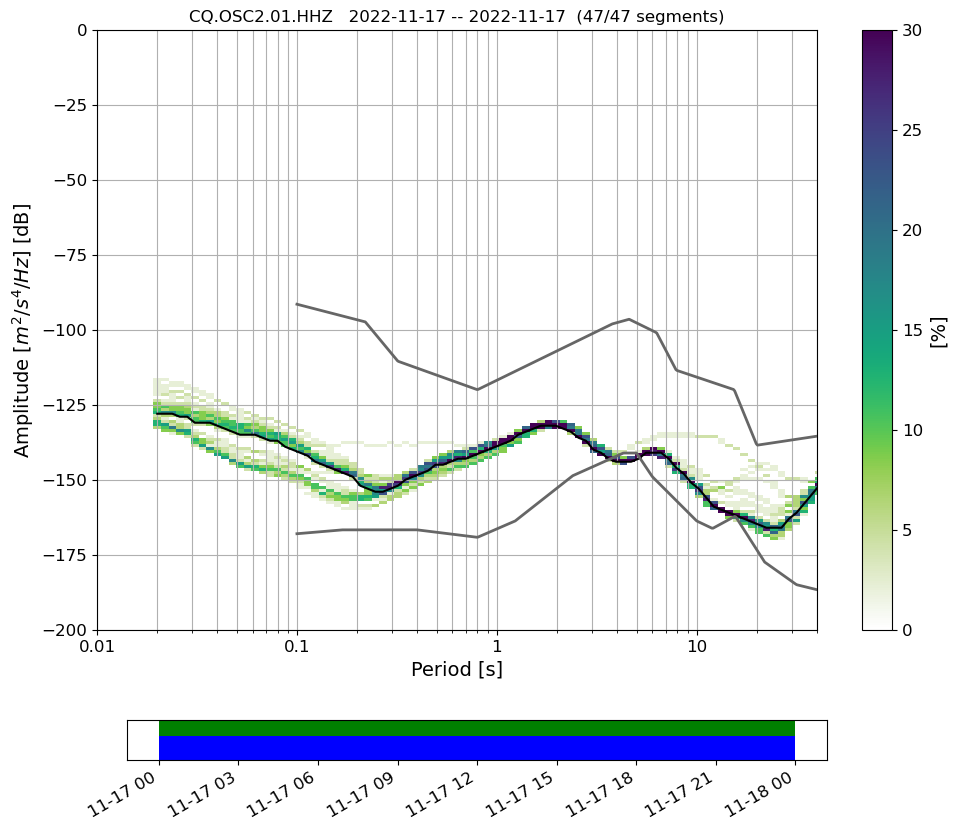

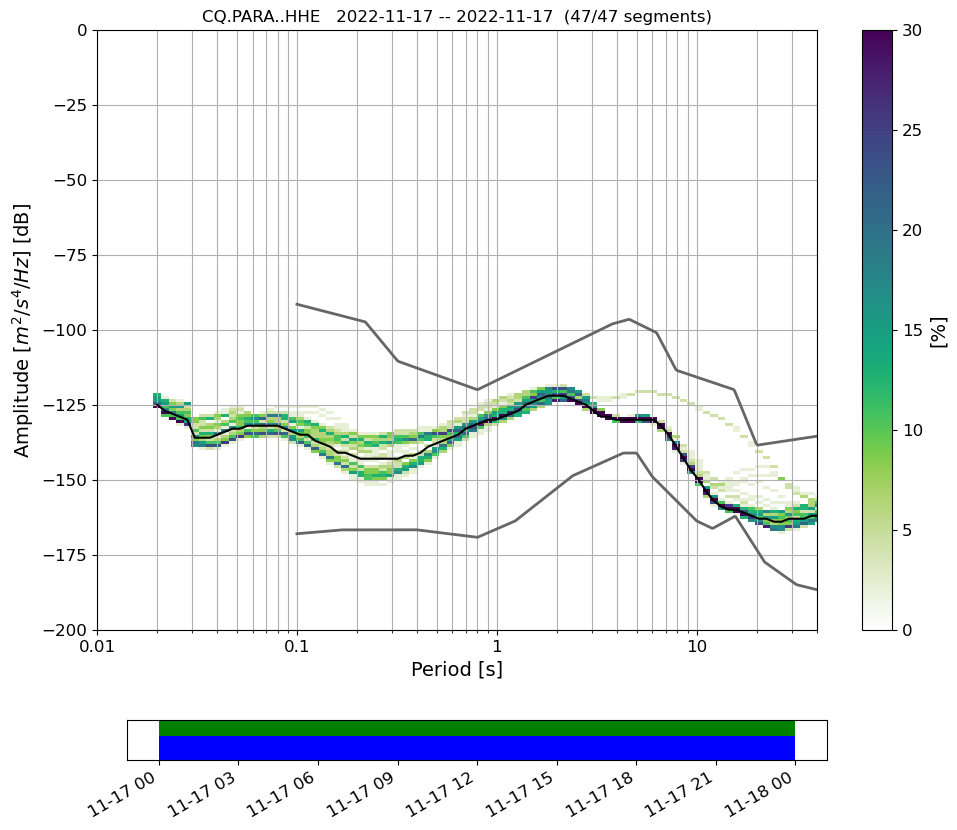

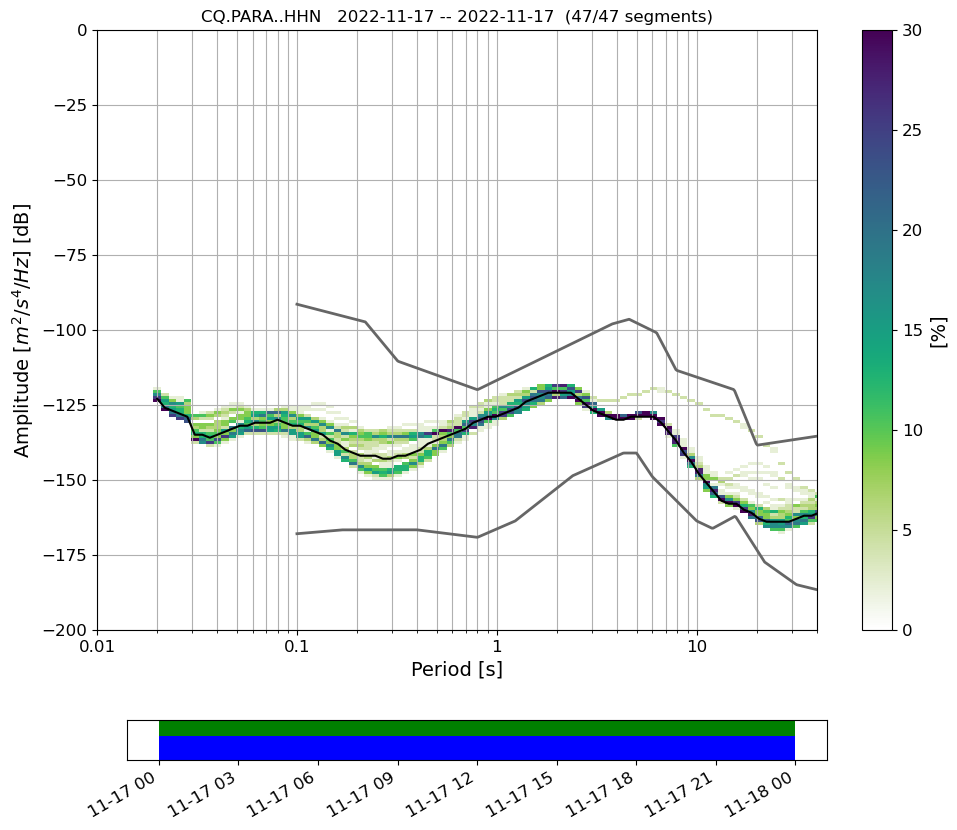

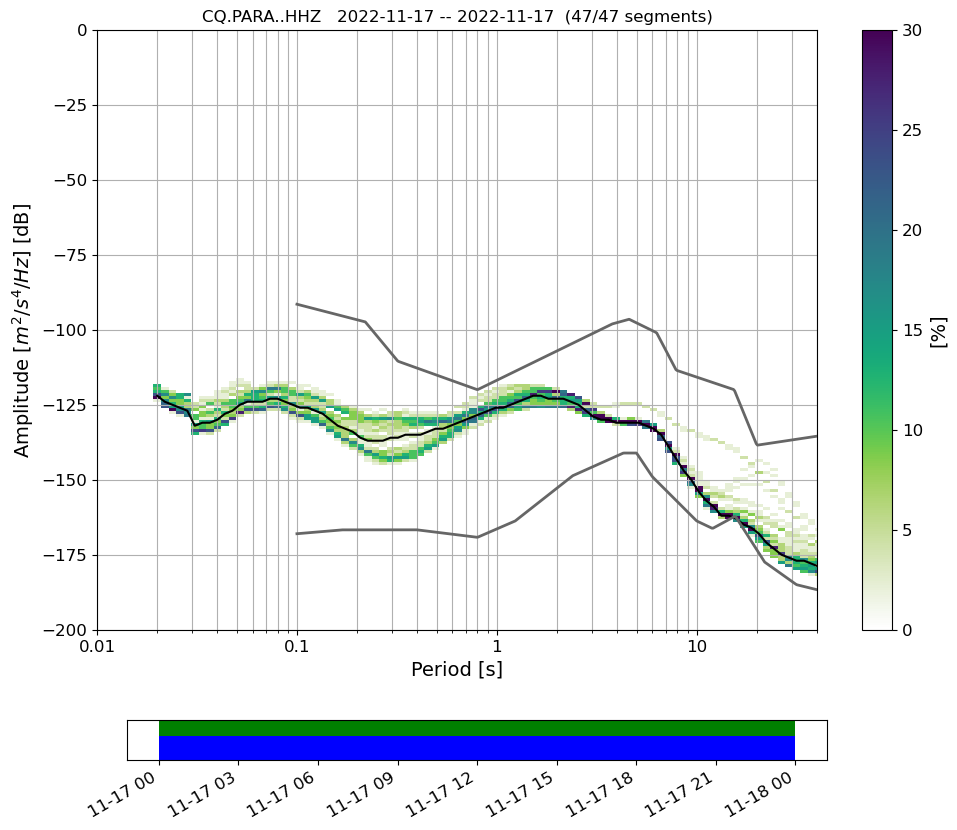

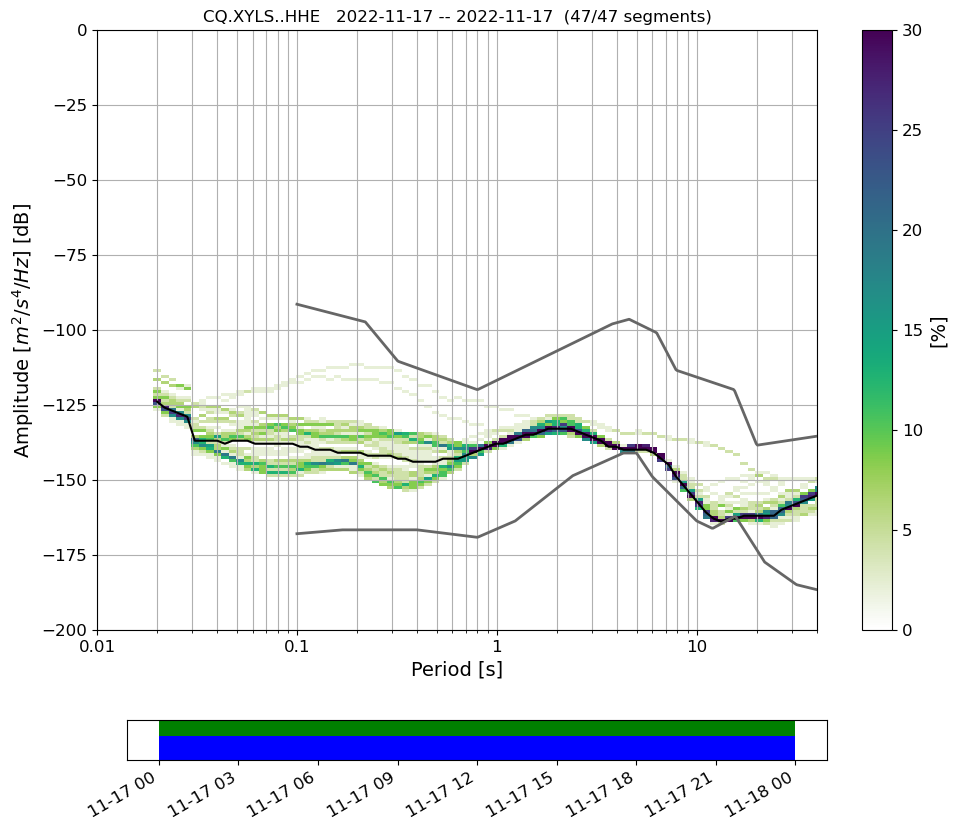

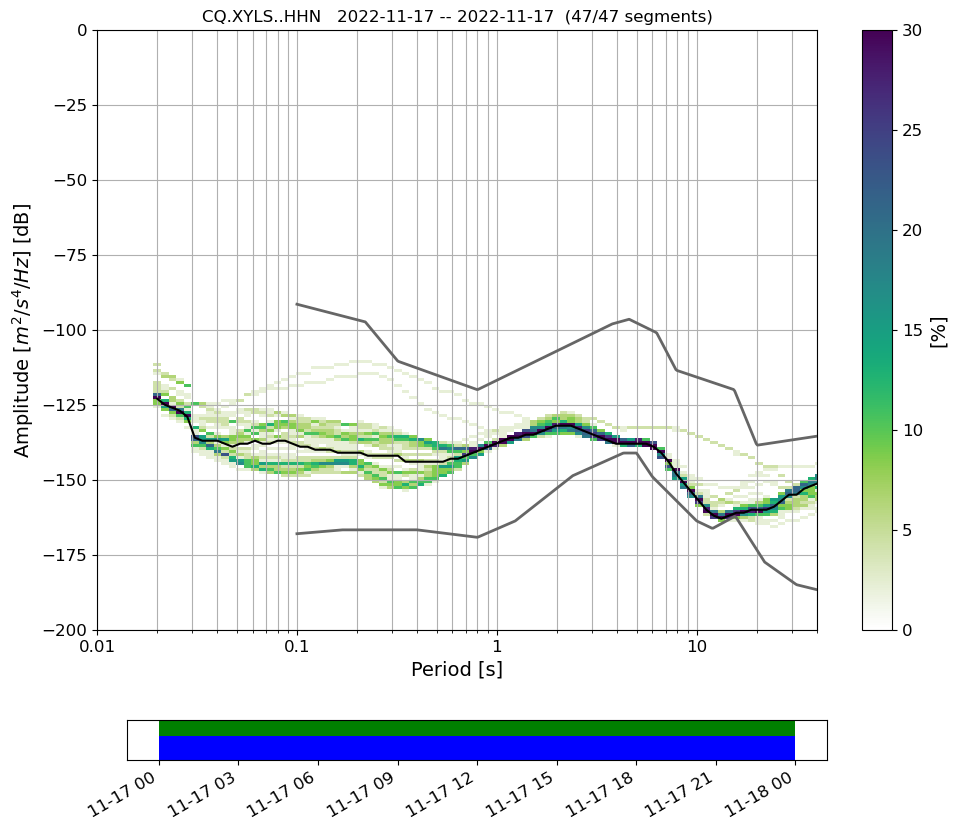

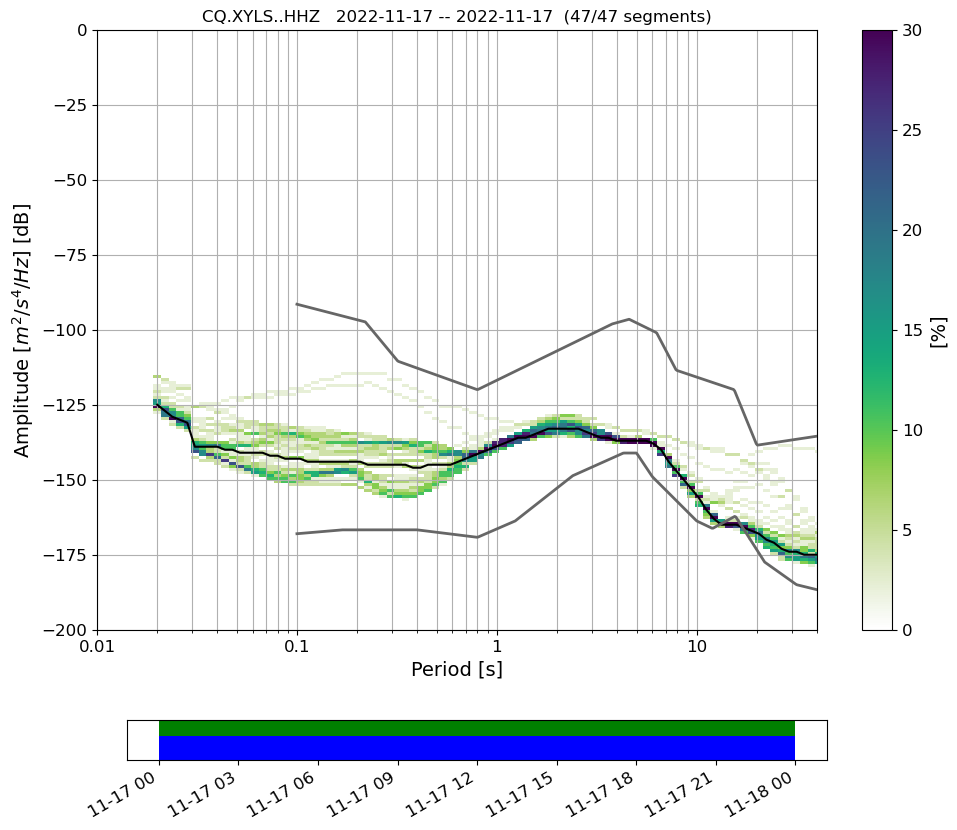

In [44]:
# PPSD for multiple traces in stream:
for tr in st_merge:
    # ppsd = PPSD(stats=tr.stats, metadata=inv, db_bins=(min_db, max_db, ddb), ppsd_length=ppsd_length, 
    #             period_smoothing_width_octaves=period_smoothing_width_octaves, 
    #             period_step_octaves=period_step_octaves)
    ppsd = PPSD(stats=tr.stats, metadata=inv, db_bins=(min_db, max_db, ddb), ppsd_length=ppsd_length, 
                period_smoothing_width_octaves=period_smoothing_width_octaves, 
                period_step_octaves=period_step_octaves, special_handling=None)
    

    ppsd.add(tr)
    #ppsd.add(st_merge[1])

    #ppsd.plot(cmap=cmap, period_lim=(period_low, period_max), show_mean = True, )
    # ppsd.plot(cmap=cmap, period_lim=(period_low, period_max), show_mean = True, 
    #           show_earthquakes=(-1, 2, 0, 10) )
    fig = ppsd.plot(cmap=cmap, period_lim=(freq_min, freq_max), show_percentiles = True, percentiles=[50],
                    xaxis_frequency=False, show=False)
    # Eq show (0, 7.6, 10)

    if not os.path.exists('../CQ_data/PPSD_plots/{}.{}'.format(ppsd.network, ppsd.station)):
        os.makedirs('../CQ_data/PPSD_plots/{}.{}'.format(ppsd.network, ppsd.station)) 

    outfile = '../CQ_data/PPSD_plots/{}.{}/{}.{}_PPSD_{}.png'.format(ppsd.network, ppsd.station, ppsd.station,
                                                              ppsd.channel,
                                                             ppsd.current_times_used[0].strftime('%Y-%m-%d'))


    plt.savefig(fname=outfile)

#     # Save the PPSD
#     if not os.path.exists('../PPSD_perm_stations/{}.{}'.format(ppsd.network, ppsd.station)):
#         os.makedirs('../PPSD_perm_stations/{}.{}'.format(ppsd.network, ppsd.station)) 

#     psd_outfile = '../PPSD_perm_stations/{}.{}/{}.{}_PPSD_data_{}_{}.npz'.format(ppsd.network, ppsd.station, ppsd.station,
#                                                               ppsd.channel,
#                                                              ppsd.current_times_used[0].strftime('%Y-%m-%d'),
#                                                                            ppsd.current_times_used[-1].strftime('%Y-%m-%d'))
#     ppsd.save_npz(psd_outfile) 

The plot here, following the paper, shows the probability for the power from the PDF in %, along with the New High and New Low Noise Models (NHNM and NLNM, respectively).

Below the actual PPSD (for a detailed discussion see paper) is a visualization of the data basis for the PPSD (can also be switched off during plotting). The top row shows data fed into the PPSD, green patches represent available data, red patches represent gaps in streams that were added to the PPSD. The bottom row in blue shows the single psd measurements that go into the histogram. The default processing method fills gaps with zeros, these data segments then show up as single outlying psd lines.



In [ ]:

if epsOPT:
    ppsd.plot(eps_fi, cmap=cmap, period_lim=(period_low, period_max), show_mean = True, )

In [ ]:

fig = plt.figure(figsize=(24, 6))
#plt.plot(st[0].data)
#plt.ylim(200,500)
sncl0 = get_seedid(st[0])
#sncl1 = get_seedid(st[1])
#sncl2 = get_seedid(st[2])

plt.plot_date(st[0].times("matplotlib"), st[0].data*1+0, fmt='-', label=sncl0, color="black",  linewidth=1.25, linestyle='dashed')
#plt.plot_date(st[1].times("matplotlib"), st[1].data*1+0, fmt='-', label=sncl1, color="blue",  linewidth=1.25, linestyle='dotted')
#plt.plot_date(st[2].times("matplotlib"), st[2].data*1, fmt='-', label=sncl2, color="red",  linewidth=1.25, linestyle='solid')
#plt.plot_date(st[1].times("matplotlib"), st[1].data*1, fmt='-', label=sncl2, color="blue", linewidth=0.75, linestyle='solid')

import matplotlib.dates as mdates 
myFmt = mdates.DateFormatter("%D/%H:%M") 
#mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")
myFmt = mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S") 
plt.gca().xaxis.set_major_formatter(myFmt) 

#plt.ylim(0, 500)
plt.ylim(-1000, 6000)
plt.xlim(st[0].times("matplotlib")[0], st[0].times("matplotlib")[-1])

plt.ylabel("Amplitude (counts)")
plt.legend()
plt.grid()